# [Assignment] Lead Scoring Model 

## 1. Data understanding 

### 1.1 Loading dataset 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings(action='ignore') 

In [4]:
pd.set_option('display.max_columns', 200) 
pd.set_option('display.max_info_columns', 200) 
pd.set_option('display.max_rows', 200) 

In [5]:
df_leads = pd.read_csv('Leads.csv')
df_leads.head(50)

Prospect ID  Lead Number  \
0   7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1   2a272436-5132-4136-86fa-dcc88c88f482       660728   
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3   0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
5   2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7   20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8   cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9   af465dfc-7204-4130-9e05-33231863c4b5       660616   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12  8bf76a52-2478-476b-8618-1688e07874ad       660562   
13  88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14  a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15  25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16  3abb7c77-1634-4083-9a9f-861068220611       660540   
17  e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18  82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19  4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20  c4419c99-b002-408b-a6fd-fa100716592c       660479   
21  fd71ab5b-53b8-4105-9960-efedc44962fa       660478   
22  8fd38b83-5c32-4277-bcfb-499f34a01c56       660471   
23  ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
24  ecd117ca-375f-49ea-afd6-b52b84d00c69       660458   
25  31c326f0-4a9b-43a6-9006-99d3830fbcae       660447   
26  c494aca4-8c8e-4081-9784-41eb6346015e       660432   
27  6d143c0e-abae-425f-a2c0-52c2946cbd45       660424   
28  8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423   
29  b3455e2e-8236-478a-b1aa-666ad3381722       660410   
30  da8c5ce5-52b5-4a4e-bf75-e533d2aca52c       660402   
31  d2055a36-b268-43a0-beeb-9a715f6a660d       660374   
32  c7d82991-3477-40ca-a616-db2d09228a55       660361   
33  5af0914a-fa65-48e1-b11e-b44849206dc3       660339   
34  bc19e116-132c-4e00-a3fa-caa1ddda2f4e       660333   
35  30422ea1-36fe-465e-9e68-41ee190fefb3       660321   
36  a8ecfc52-9988-498a-9a21-df747891b847       660312   
37  e60a54bc-0816-430e-a99a-019a8b5a27e5       660267   
38  e50b7515-b5a5-4691-a450-5e28ba99b472       660255   
39  d6686032-c65e-4495-a0f4-ba7471209356       660236   
40  daebea93-20bd-48be-b89b-85c7711ca0d7       660235   
41  3ec75559-60f8-46f0-9198-bd3d05c464aa       660222   
42  d262e52a-b8e1-4164-b869-bb199ddf75a9       660215   
43  abc432ac-7393-4312-b49f-c43702397416       660203   
44  85195b85-b384-4745-8e50-719566f70f52       660194   
45  fd31b6df-f961-43ba-8e81-618ce5aabfe5       660180   
46  18633077-5162-4cc6-8728-bc25f7a32fd1       660174   
47  3f04fd93-2884-45f6-a4fc-f3b6f234554b       660153   
48  86681269-67b1-4909-90c0-216136535815       660149   
49  319325b3-50b3-45d0-b730-c9df0b30b9ea       660128   

                Lead Origin     Lead Source Do Not Email Do Not Call  \
0                       API      Olark Chat           No          No   
1                       API  Organic Search           No          No   
2   Landing Page Submission  Direct Traffic           No          No   
3   Landing Page Submission  Direct Traffic           No          No   
4   Landing Page Submission          Google           No          No   
5                       API      Olark Chat           No          No   
6   Landing Page Submission          Google           No          No   
7                       API      Olark Chat           No          No   
8   Landing Page Submission  Direct Traffic           No          No   
9                       API          Google           No          No   
10  Landing Page Submission  Organic Search           No          No   
11  Landing Page Submission  Direct Traffic           No          No   
12                      API  Organic Search           No          No   
13  Landing Page Submission  Organic Search           No          No   
14  Landing Page Submission  Direct Traff

In [6]:
df_leads.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df_leads.describe() 

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### 1.2 Null fields analysis 

In [8]:
# Summary null count and null percentage 
def check_null_values (df): 
    df_leads_null = df.isnull().sum() 
    df_leads_null = df_leads_null.reset_index() 
    df_leads_null.columns = ['col', 'null'] 
    df_leads_null['pct'] = round(df_leads_null['null']/df.shape[0] * 100, 2) 
    return df_leads_null.sort_values(by='pct', ascending=False)  

df = check_null_values(df_leads) 
df 

col  null    pct
25                                   Lead Quality  4767  51.59
30                    Asymmetrique Activity Index  4218  45.65
33                     Asymmetrique Profile Score  4218  45.65
32                    Asymmetrique Activity Score  4218  45.65
31                     Asymmetrique Profile Index  4218  45.65
24                                           Tags  3353  36.29
28                                   Lead Profile  2709  29.32
15  What matters most to you in choosing a course  2709  29.32
14                What is your current occupation  2690  29.11
11                                        Country  2461  26.63
13             How did you hear about X Education  2207  23.89
12                                 Specialization  1438  15.56
29                                           City  1420  15.37
9                            Page Views Per Visit   137   1.48
7                                     TotalVisits   137   1.48
10                                  Last Activity   103   1.11
3                                     Lead Source    36   0.39
23         Receive More Updates About Our Courses     0   0.00
34       I agree to pay the amount through cheque     0   0.00
27                      Get updates on DM Content     0   0.00
26              Update me on Supply Chain Content     0   0.00
35         A free copy of Mastering The Interview     0   0.00
0                                     Prospect ID     0   0.00
18                              Newspaper Article     0   0.00
22                        Through Recommendations     0   0.00
21                          Digital Advertisement     0   0.00
20                                      Newspaper     0   0.00
19                             X Education Forums     0   0.00
1                                     Lead Number     0   0.00
17                                       Magazine     0   0.00
16                                         Search     0   0.00
8                     Total Time Spent on Website     0   0.00
6                                       Converted     0   0.00
5                                     Do Not Call     0   0.00
4                                    Do Not Email     0   0.00
2                                     Lead Origin     0   0.00
36                          Last Notable Activity     0   0.00

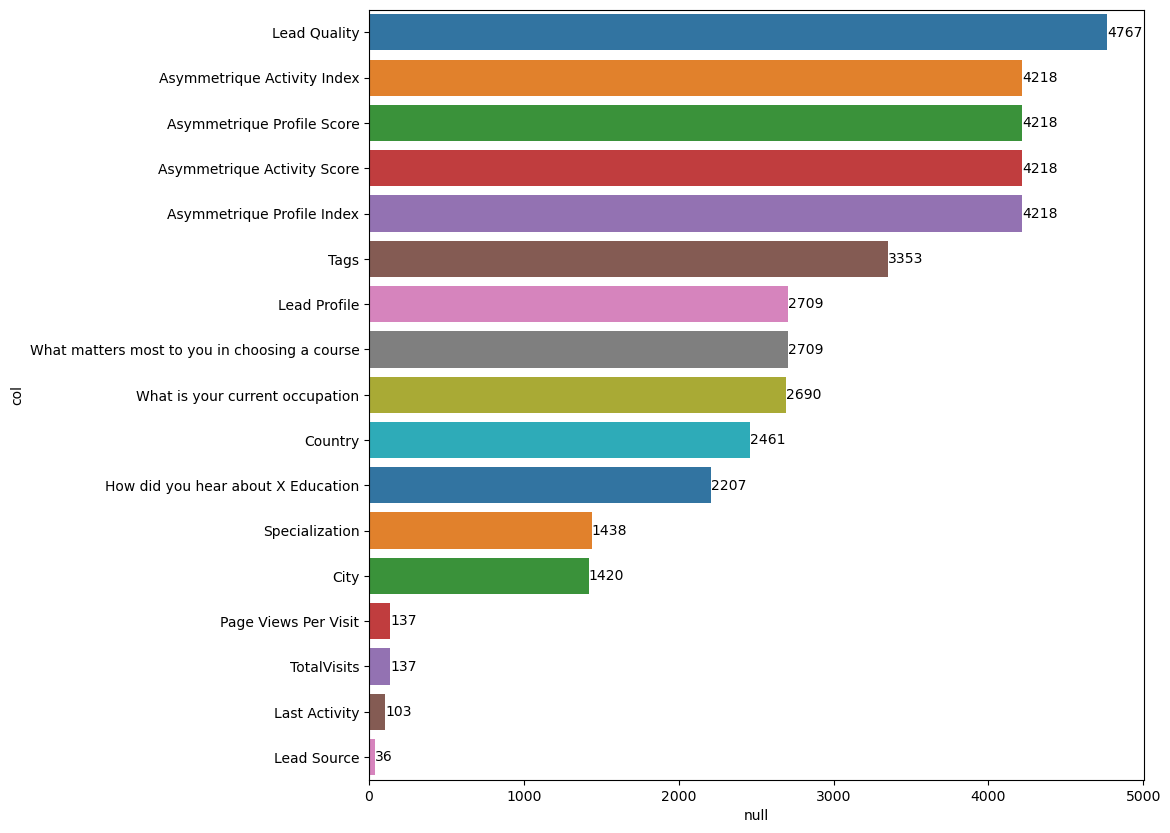

In [9]:
plt.figure(figsize=[10, 10]) 
ax = sns.barplot(data=df[df.null>0], y='col', x='null', palette='tab10')  

for i in ax.containers:
    ax.bar_label(i,) 

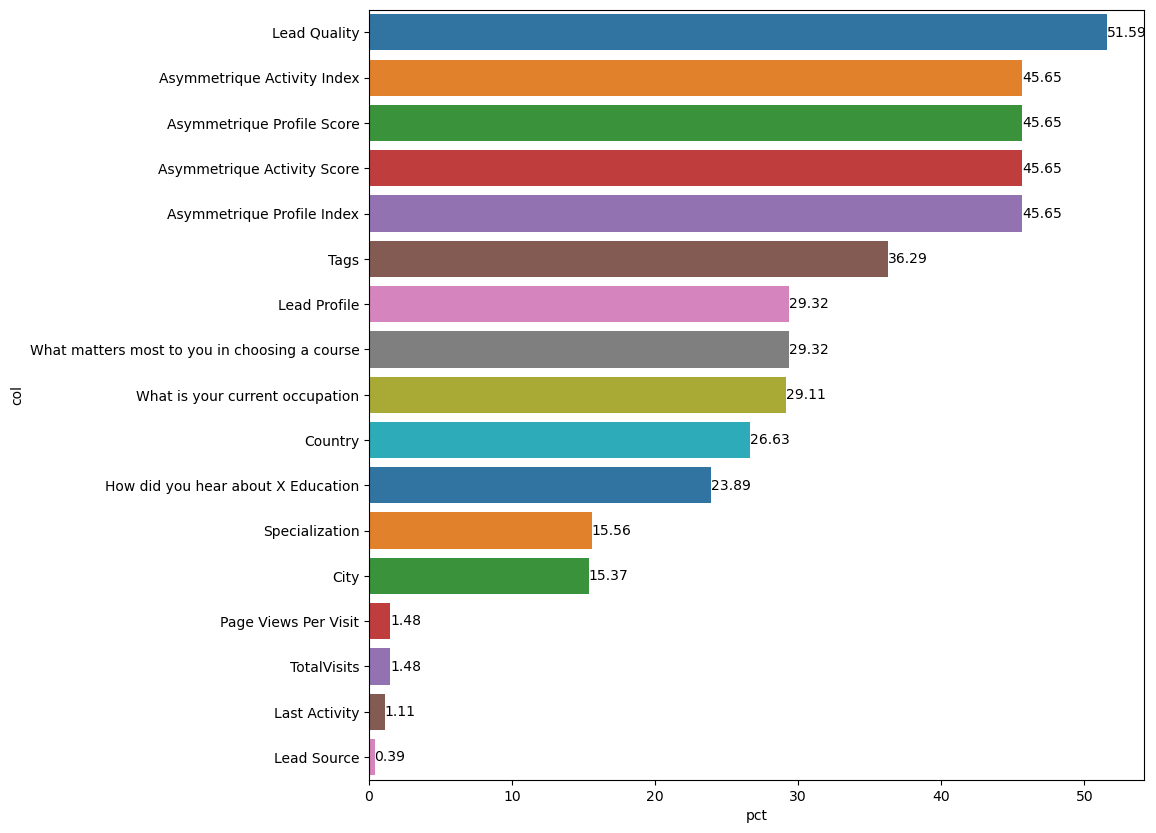

In [10]:
plt.figure(figsize=[10, 10]) 
ax = sns.barplot(data=df[df.null>0], y='col', x='pct', palette='tab10')  

for i in ax.containers:
    ax.bar_label(i,) 

In [11]:
# Field 1: "Lead Quality"	4767	51.59% 

df_leads['Lead Quality'].value_counts() 

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [12]:
# Field 2: "Asymmetrique Activity Index"	4218	45.65% 
# Field 3: "Asymmetrique Profile Index"	4218	45.65

print(df_leads['Asymmetrique Activity Index'].value_counts()) 
print('\n') 
print(df_leads['Asymmetrique Profile Index'].value_counts()) 

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64


Asymmetrique Profile Index
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64


In [13]:
# Field 4: Asymmetrique Profile Score	4218	45.65
# Field 5: Asymmetrique Activity Score	4218	45.65

df_leads[['Asymmetrique Profile Score', 'Asymmetrique Activity Score']].describe() 

Asymmetrique Profile Score  Asymmetrique Activity Score
count                 5022.000000                  5022.000000
mean                    16.344883                    14.306252
std                      1.811395                     1.386694
min                     11.000000                     7.000000
25%                     15.000000                    14.000000
50%                     16.000000                    14.000000
75%                     18.000000                    15.000000
max                     20.000000                    18.000000

In [14]:
# Field 6: Tags	3353	36.29 

df_leads['Tags'].value_counts() 

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [15]:
# Field 7: Lead Profile	2709	29.32 
df_leads['Lead Profile'].value_counts() 

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [16]:
# Field 8: What matters most to you in choosing a course	2709	29.32 
df_leads['What matters most to you in choosing a course'].value_counts() 

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [17]:
# Field 9: What is your current occupation	2690	29.11 
df_leads['What is your current occupation'].value_counts() 

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [18]:
# Field 10: Country	2461	26.63 
df_leads['Country'].value_counts() 

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [19]:
# Field 11: How did you hear about X Education	2207	23.89 
df_leads['How did you hear about X Education'].value_counts() 

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [20]:
# Field 12: Specialization	1438	15.56 
df_leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [21]:
# Field 13: City	1420	15.37 
df_leads['City'].value_counts() 

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

## 2 Data cleaning (Part 1 - Before Visualization) 

### 1.2.1 Dropping columns (missing >45%) 
Following fields have high missing percentages, it will impact to ML result. We can drop these without impacting to overal result 
 - Field 1: Lead Quality: over 51% 
 - Field 2: "Asymmetrique Activity Index"	4218	45.65% 
 - Field 3: "Asymmetrique Profile Index"	4218	45.65
 - Field 4: Asymmetrique Profile Score	4218	45.65
 - Field 5: Asymmetrique Activity Score	4218	45.65

In [22]:
# Check number of columns before dropping 
df_leads.columns.size 

37

In [23]:
df_leads = df_leads.drop(columns=['Lead Quality', 
                       'Asymmetrique Activity Index', 
                       'Asymmetrique Activity Score', 
                       'Asymmetrique Profile Index', 
                       'Asymmetrique Profile Score'])
df_leads.head() 

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          

In [24]:
# Check number of columns after dropping 
df_leads.columns.size 

32

### 1.2.2 Dropping ID fields 
- Field 6: Prospect ID 
- Field 7: Lead Number 

In [25]:
# Field 6: Drop 'Prospect ID' as this unique ID is not a feature of ML 
df_leads =  df_leads.drop(columns=['Prospect ID']) 


In [26]:
# Field 7: Drop 'Lead Number' as this unique ID is not a feature of ML 
df_leads =  df_leads.drop(columns=['Lead Number'])  


### 1.2.3 Impute the values 

#### Field 8: Tags	 3353 - 36.29%
- Meaning:Tags assigned to customers indicating the current status of the lead.
   - The null value here: means employee have not assign any alignment actions with lead.
   - Some values have very small percentage (<1%)
- Hypothesis: These tags is important for predicting target var (ex: "Will revert after reading the email" means that we have high chance to convert this lead to customer as customer is considering...)
- Decision:
   - we can categorize as "Other" so we can consider as a feature for ML algorithm later.
   - For values which have count <1%, we can group to "Other" 

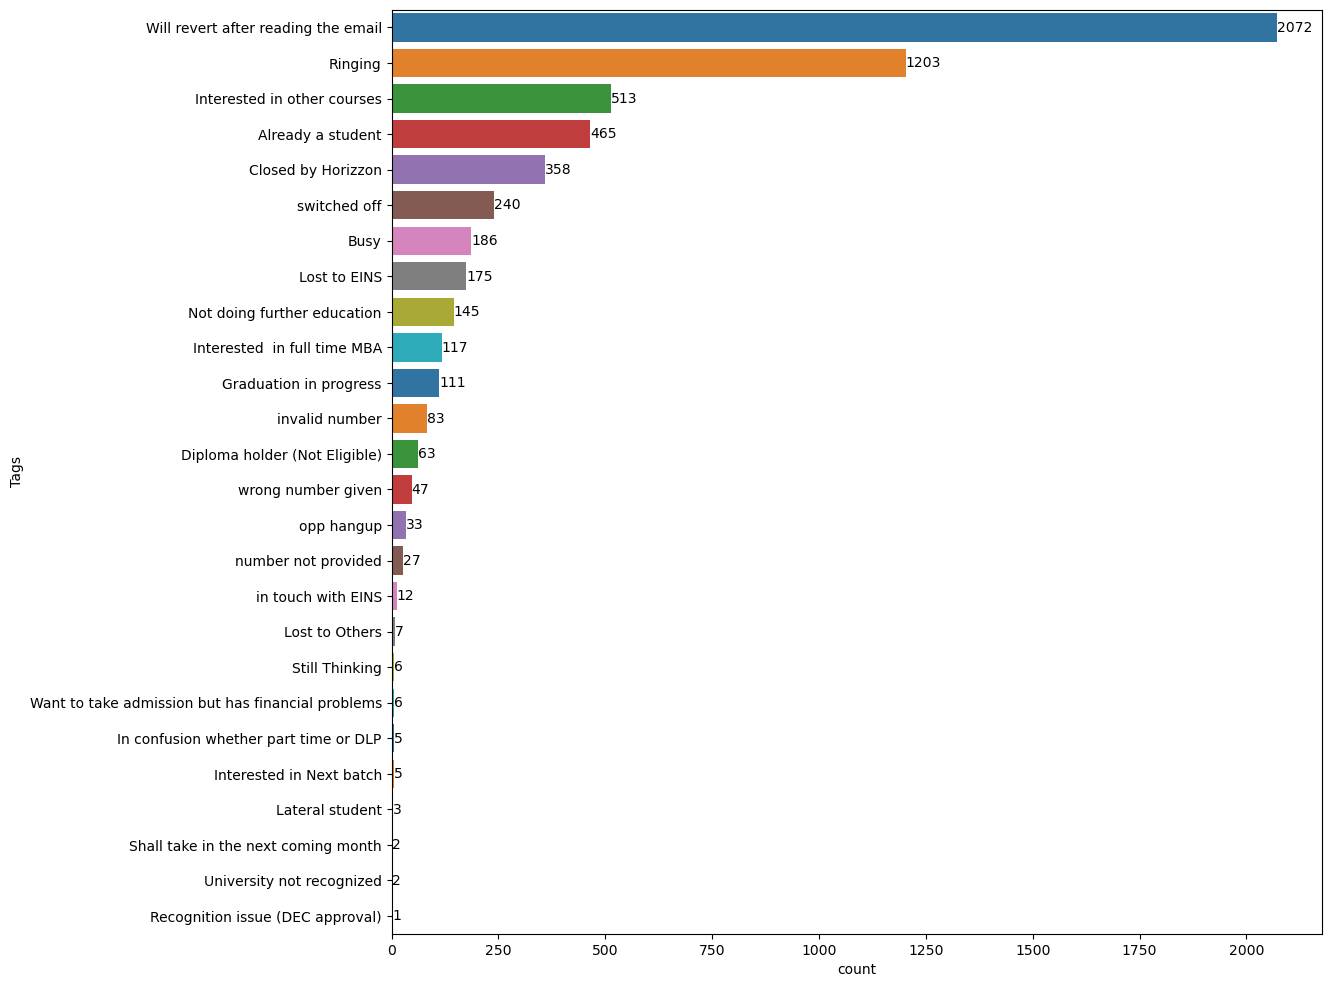

In [27]:
# Before imputing 
plt.figure(figsize=[12, 12])
ax = sns.barplot(df_leads['Tags'].value_counts(), orient='h', palette='tab10') 

for i in ax.containers:
    ax.bar_label(i,) 
    
plt.show() 

In [28]:
non_popular_values = df_leads['Tags'].value_counts()[
                    df_leads['Tags'].value_counts()/df_leads['Tags'].value_counts().sum() * 100<1
                ].index.to_list() 

non_popular_values

['wrong number given',
 'opp hangup',
 'number not provided',
 'in touch with EINS',
 'Lost to Others',
 'Still Thinking',
 'Want to take admission but has financial problems',
 'In confusion whether part time or DLP',
 'Interested in Next batch',
 'Lateral student',
 'Shall take in the next coming month',
 'University not recognized',
 'Recognition issue (DEC approval)']

In [29]:
# Fill Other to null value 
df_leads['Tags'] = df_leads['Tags'].fillna('Other') 

# Replace the non-popular-value to Other 
df_leads.loc[df_leads['Tags'].isin(non_popular_values), 'Tags'] = 'Other' 

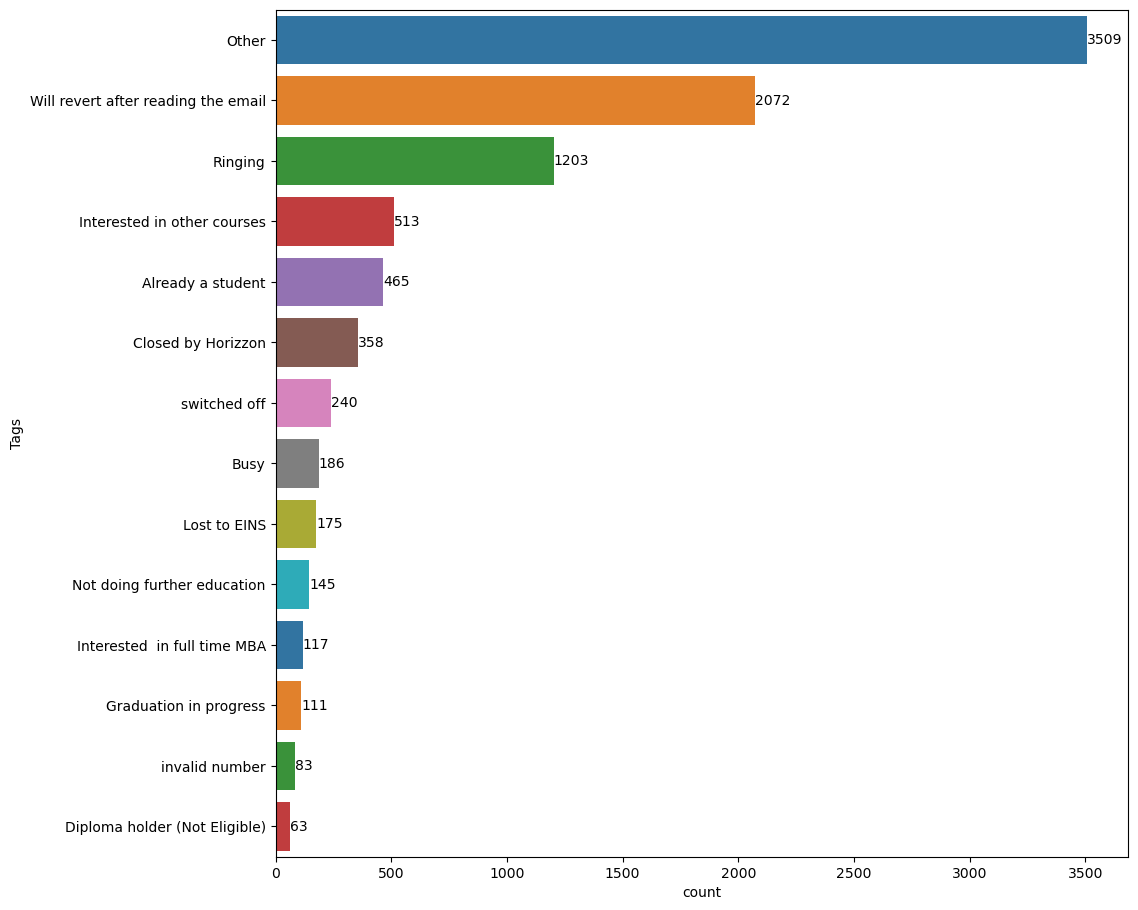

In [30]:
# After imputing 
plt.figure(figsize=[11, 11])
ax = sns.barplot(df_leads['Tags'].value_counts(), orient='h', palette='tab10') 

for i in ax.containers: 
    ax.bar_label(i, )
    
plt.show() 

#### Field 9: Lead Profile	2709 - 29.32% 
- Meaning: A lead level assigned to each customer based on their profile. 
- Status: There are 2709 cases null, 4146 cases "Select" (have not assigned values from the UI, also consider as null). So total null in this case = 6855 cases (74.2%)
- Hypothesis: Some Lead_Profiles can show the higher conversion (ex: "Potential Lead"). This will drive the predict result 
- Decision: We will keep this column and standardize null/Select/Other Leads value as 'Other' 

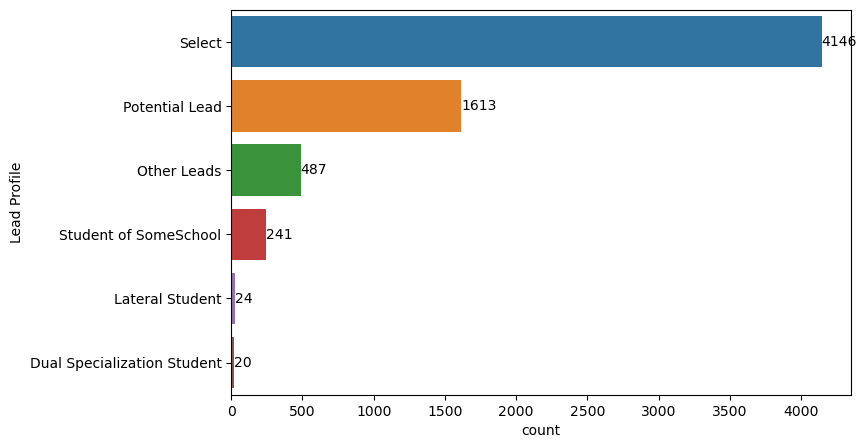

In [31]:
plt.figure(figsize=[8, 5])  
ax = sns.barplot(df_leads['Lead Profile'].value_counts(), palette='tab10', orient='h')  

for i in ax.containers: 
    ax.bar_label(i, ) 

In [32]:
# extract values which appeared <1% to "Other"
non_popular_values = df_leads['Lead Profile'].value_counts()[ 
                        df_leads['Lead Profile'].value_counts()/df_leads.shape[0]*100 < 1 
                    ].index.to_list()  
non_popular_values

['Lateral Student', 'Dual Specialization Student']

In [33]:
# Update null value 
df_leads['Lead Profile'] = df_leads['Lead Profile'].fillna('Other')

# Update "Select" to "None"
df_leads.loc[df_leads['Lead Profile']=='Select', 'Lead Profile'] = 'Other' 

# Update "Other Leads" to "Other"
df_leads.loc[df_leads['Lead Profile']=='Other Leads', 'Lead Profile'] = 'Other' 

# Update value which appeared <1% to "Other"
df_leads.loc[df_leads['Lead Profile'].isin(non_popular_values), 'Lead Profile'] = 'Other' 


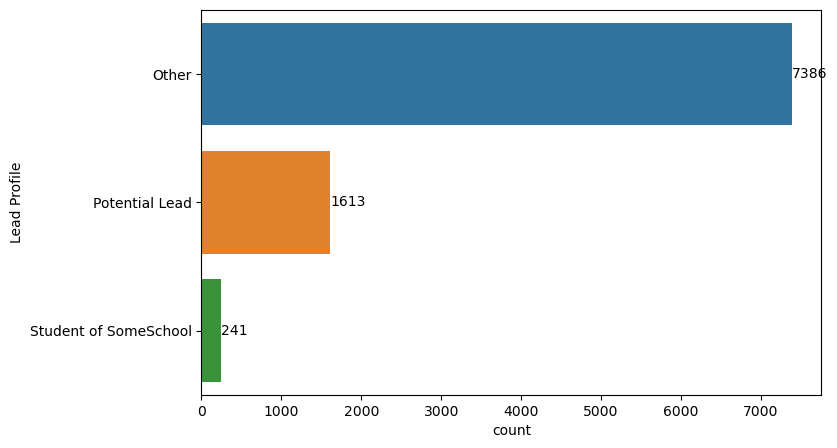

In [34]:
plt.figure(figsize=[8, 5])   
ax = sns.barplot(df_leads['Lead Profile'].value_counts(), palette='tab10', orient='h')  

for i in ax.containers: 
    ax.bar_label(i, ) 

#### Field 10: What matters most to you in choosing a course	2709-29.32%  
- This field showing the user motivations in choosing a course to learn. So this field is very important for ML model to make prediction
- The null values can be categorised as "Other" as user don't have any preferences in this case or user forgot to select. 

In [35]:
# Before imputing...
df_leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [36]:
df_leads['What matters most to you in choosing a course'] =  df_leads['What matters most to you in choosing a course'].fillna('Other') 

In [37]:
# After imputing...
df_leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: count, dtype: int64

#### Field 11: What is your current occupation	2690-29.11% 
- This field is also important to know what topics/courses user are preferring
- Some hypothesis such as: student & unemployeed may want to register courses than others
- Decision:
    - So this field should be kept. The null field can be categorised as "Other"
    - The non-popular-values (appeared<1%) should be converted to "Other" 

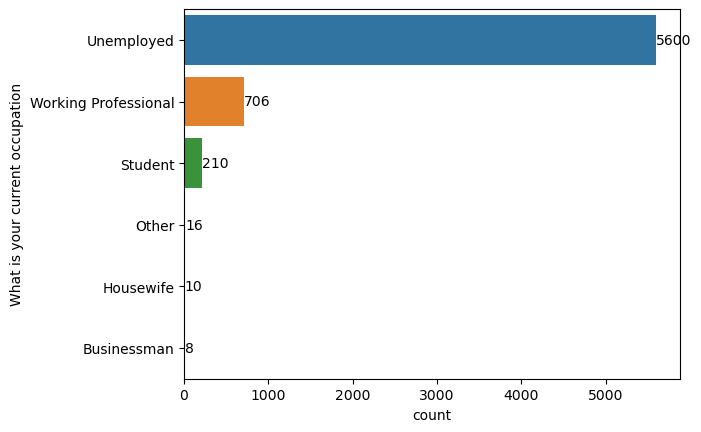

In [38]:
# Before imputing...
ax = sns.barplot(df_leads['What is your current occupation'].value_counts(), palette='tab10', orient='h') 

for i in ax.containers: 
    ax.bar_label(i, ) 

In [39]:
non_popular_values = df_leads['What is your current occupation'].value_counts()[
                        df_leads['What is your current occupation'].value_counts()/df_leads.shape[0]*100<1
                    ].index.to_list() 

non_popular_values

['Other', 'Housewife', 'Businessman']

In [40]:
# Replace null with Other
df_leads['What is your current occupation'] =  df_leads['What is your current occupation'].fillna('Other') 

# Replace non-popular-values to Other 
df_leads.loc[
    df_leads['What is your current occupation'].isin(non_popular_values), 
    'What is your current occupation'
] =  'Other' 

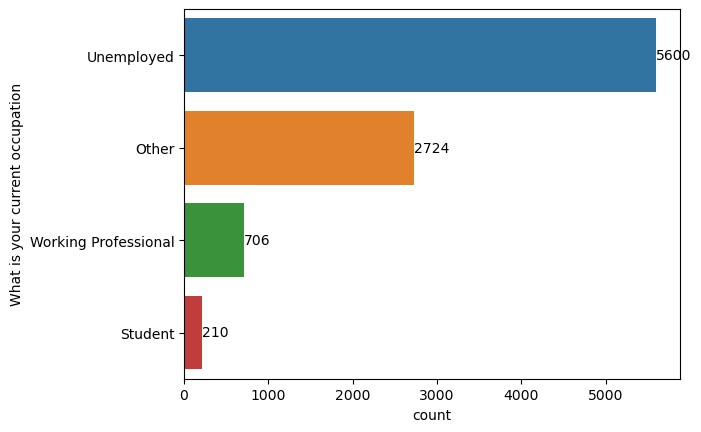

In [41]:
# After imputing... 
ax = sns.barplot(df_leads['What is your current occupation'].value_counts(), palette='tab10', orient='h') 

for i in ax.containers: 
    ax.bar_label(i,) 

#### Field 12: Country	2461-26.63% 
- Hypothesis: Some countries will have the culture to learn the course more than other countries
- Decision: We keep this field
  - Tthe null value will be categories as "Other".
  - The "unknown" should be mapped to "Other" as well
  - Except India and United States, the remaining countries have too less counts (<0.8%). we can consider these countries as "Other" so that we can reduce the dummy variables later 

In [42]:
# Before imputing .... 
df_leads['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [43]:
df_leads['Country'] = df_leads['Country'].fillna('Other') 

# Update "unknown" to "Other"
df_leads.loc[(df_leads['Country']!='India') & (df_leads['Country']!='United States'), 'Country'] = 'Other' 

In [44]:
# After imputing .... 
df_leads['Country'].value_counts()

Country
India            6492
Other            2679
United States      69
Name: count, dtype: int64

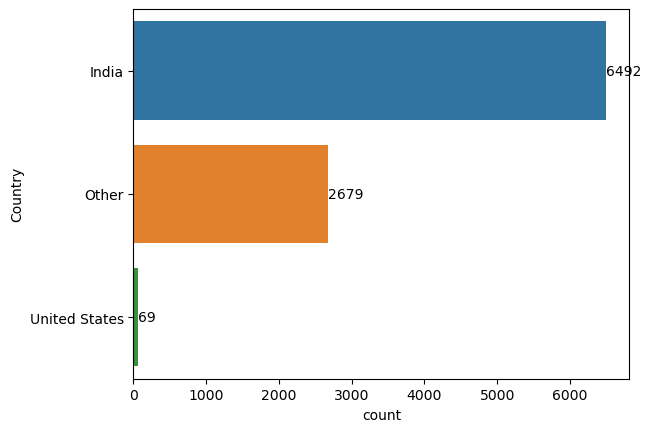

In [45]:
ax = sns.barplot(df_leads['Country'].value_counts(), palette='tab10', orient='h')  

for i in ax.containers: 
    ax.bar_label(i, ) 

#### Field 13: How did you hear about X Education	2207-23.89% 
- Hypothesis: Some sources where user drove to X Education, will have higher chances to convert to customer (ex: Online Search: user make online search may have needs higher than others)
- There are 2207 null cases and 5043 "Select" cases. The "Select" value here means that: user has not selected the value from DropDown control. This is consider as null value as well. So total null is 7,250 (78.5%)
- Decision: We keep this column and categorised the "null" and "Select" values as "Other" 

<Axes: xlabel='count', ylabel='How did you hear about X Education'>

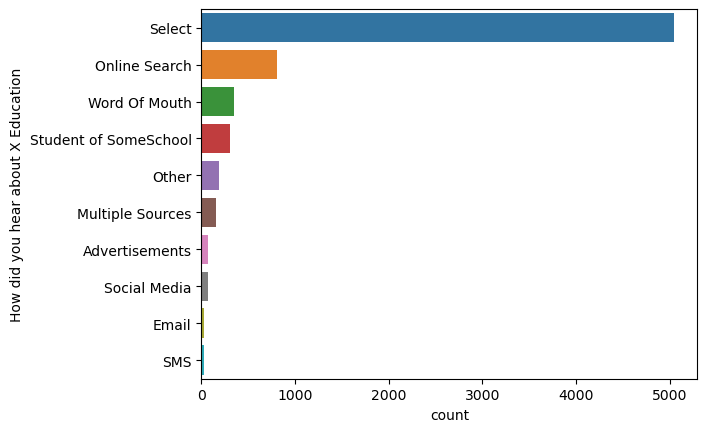

In [46]:
# Before imputing... 
sns.barplot(df_leads['How did you hear about X Education'].value_counts(), palette='tab10', orient='h') 


In [47]:
# Convert null as "Other" 
df_leads['How did you hear about X Education'] = df_leads['How did you hear about X Education'].fillna('Other')

# Convert "Select" to "Other"
df_leads.loc[df_leads['How did you hear about X Education']=='Select', 'How did you hear about X Education'] = 'Other' 


<Axes: xlabel='count', ylabel='How did you hear about X Education'>

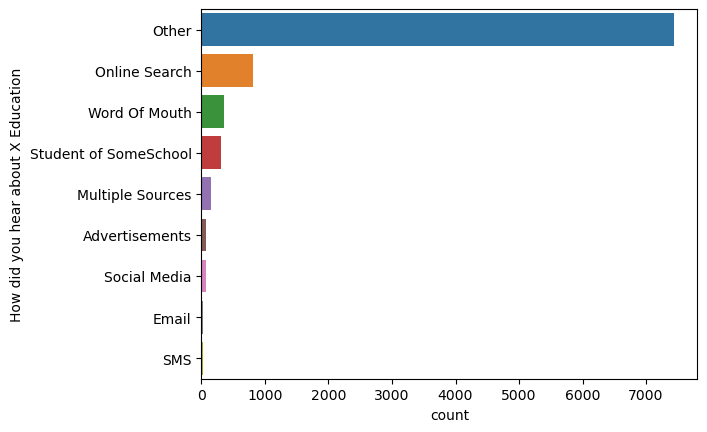

In [48]:
# After imputing... 
sns.barplot(df_leads['How did you hear about X Education'].value_counts(), palette='tab10', orient='h') 

#### Field 14: Specialization	1438-15.56% 
- Hypothesis: Some specializations might have higher rates of conversion. Because in their areas, they need to learn more new/update knowledges (ex: IT need to learn more)
- There are 1438 null cases and 1942 "Select" cases. The "Select" cases mean that user has not selected the specializations
- Decision: We keep the specialization column. The null value and "Select" value will be categorised as "None" 

<Axes: xlabel='count', ylabel='Specialization'>

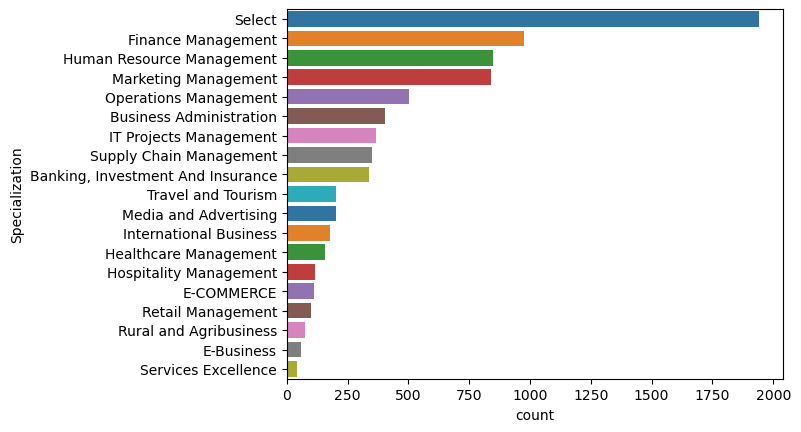

In [49]:
# Before imputing...
sns.barplot(df_leads['Specialization'].value_counts(), palette='tab10', orient='h') 

In [50]:
# Fill null with "None"
df_leads['Specialization'] =  df_leads['Specialization'].fillna('None')

# Convert "Select" to "None" 
df_leads.loc[df_leads['Specialization']=='Select', 'Specialization'] = 'None' 

<Axes: xlabel='count', ylabel='Specialization'>

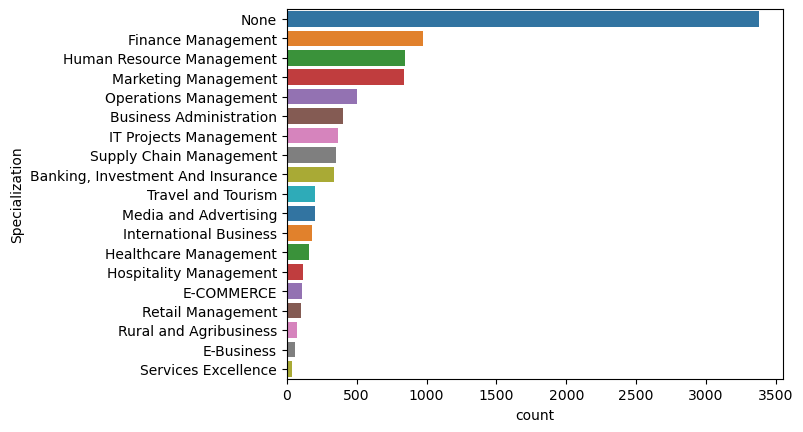

In [51]:
# After imputing...
sns.barplot(df_leads['Specialization'].value_counts(), palette='tab10', orient='h') 

#### Field 15: City	1420-15.37% 
- Hypothesis: Some particular cities may have more user to register the course than the others 
- There are 1420 null value and 2249 "Select" cases (where user has not select the city). Both of these cases are considered as null
- Decision: The null and "Select" values can be categorised to "Other Cities" category 

<Axes: xlabel='count', ylabel='City'>

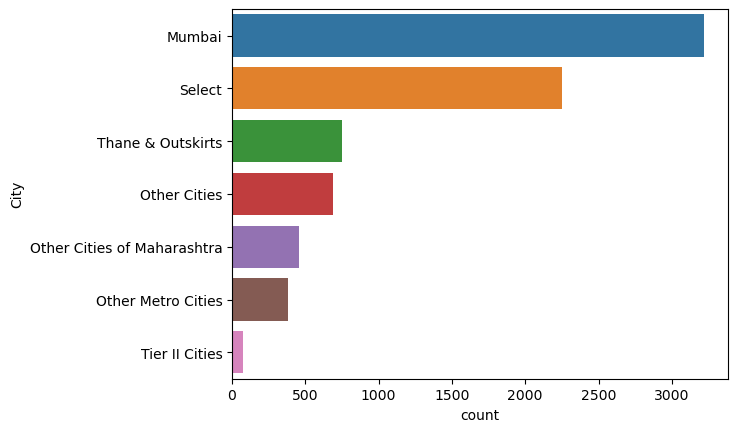

In [52]:
# Before imputing... 
sns.barplot(df_leads['City'].value_counts(), palette='tab10', orient='h') 

In [53]:
# Fill null values as "Other Cities"
df_leads['City'] =  df_leads['City'].fillna('Other Cities')

# Convert "Select" value to "Other Cities"
df_leads.loc[df_leads['City']=='Select', 'City'] = 'Other Cities'


<Axes: xlabel='count', ylabel='City'>

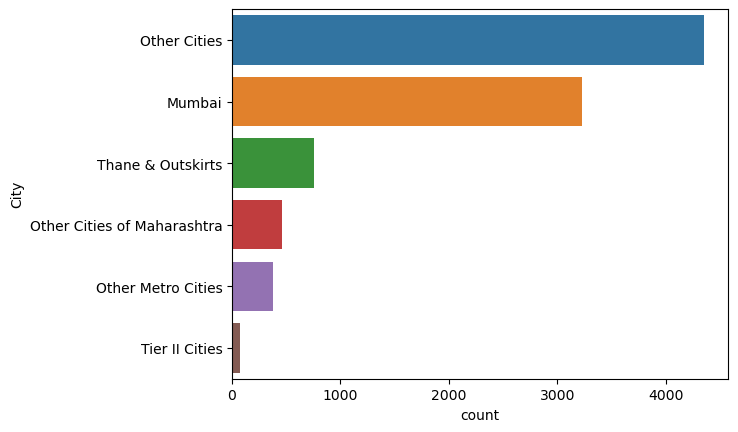

In [54]:
# Before imputing... 
sns.barplot(df_leads['City'].value_counts(), palette='tab10', orient='h') 

### 1.2.3 Dropping rows (missing <2%) 
- Field 16: Page Views Per Visit	137	1.48
- Field 17: TotalVisits	137	1.48
- Field 18: Last Activity	103	1.11
- Field 19: Lead Source	36	0.39

In [55]:
print('Before dropping null "Page Views Per Visit" row:', df_leads.shape)

df_leads = df_leads[~df_leads['Page Views Per Visit'].isnull()] 

print('After dropping null "Page Views Per Visit" row:', df_leads.shape)

Before dropping null "Page Views Per Visit" row: (9240, 30)
After dropping null "Page Views Per Visit" row: (9103, 30)


In [56]:
print('Before dropping null "TotalVisits" row:', df_leads.shape)

df_leads = df_leads[~df_leads['TotalVisits'].isnull()] 

print('After dropping null "TotalVisits" row:', df_leads.shape)

Before dropping null "TotalVisits" row: (9103, 30)
After dropping null "TotalVisits" row: (9103, 30)


In [57]:
print('Before dropping null "Last Activity" row:', df_leads.shape)

df_leads = df_leads[~df_leads['Last Activity'].isnull()] 

print('After dropping null "Last Activity" row:', df_leads.shape)

Before dropping null "Last Activity" row: (9103, 30)
After dropping null "Last Activity" row: (9103, 30)


In [58]:
print('Before dropping null "Lead Source" row:', df_leads.shape)

df_leads = df_leads[~df_leads['Lead Source'].isnull()] 

print('After dropping null "Lead Source" row:', df_leads.shape)

Before dropping null "Lead Source" row: (9103, 30)
After dropping null "Lead Source" row: (9074, 30)


## 3. Data Visualization 

### 3.1 Numeric columns 

In [59]:
df_leads.describe() 

Converted  TotalVisits  Total Time Spent on Website  \
count  9074.000000  9074.000000                  9074.000000   
mean      0.378554     3.456028                   482.887481   
std       0.485053     4.858802                   545.256560   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    11.000000   
50%       0.000000     3.000000                   246.000000   
75%       1.000000     5.000000                   922.750000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
max               55.000000

In [60]:
def visualize_numbers_data (data, color): 
    plt.figure(figsize=[10, 3]) 
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data, color=color)

    plt.subplot(1, 2, 2)
    sns.distplot(data, color=color) 

    plt.show() 


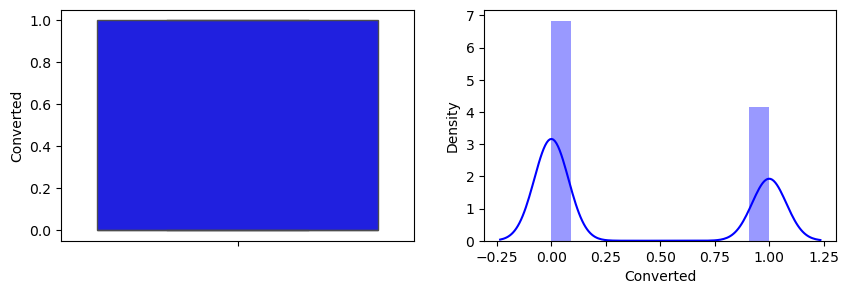

In [61]:
visualize_numbers_data(df_leads['Converted'], color='blue')     

In [62]:
help(plt.pie) 

Help on function pie in module matplotlib.pyplot:

pie(x: 'ArrayLike', explode: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, colors: 'ColorType | Sequence[ColorType] | None' = None, autopct: 'str | Callable[[float], str] | None' = None, pctdistance: 'float' = 0.6, shadow: 'bool' = False, labeldistance: 'float | None' = 1.1, startangle: 'float' = 0, radius: 'float' = 1, counterclock: 'bool' = True, wedgeprops: 'dict[str, Any] | None' = None, textprops: 'dict[str, Any] | None' = None, center: 'tuple[float, float]' = (0, 0), frame: 'bool' = False, rotatelabels: 'bool' = False, *, normalize: 'bool' = True, hatch: 'str | Sequence[str] | None' = None, data=None) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parame

In [63]:
df_leads['Converted'].value_counts().index

Index([0, 1], dtype='int64', name='Converted')

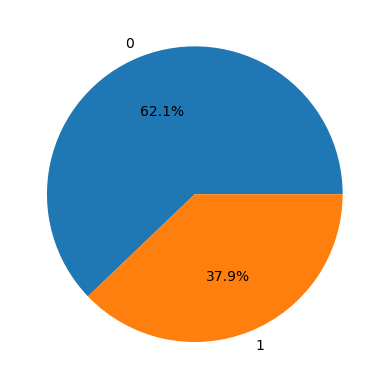

In [64]:
plt.pie(df_leads['Converted'].value_counts(), autopct='%.1f%%', labels= df_leads['Converted'].value_counts().index) 

plt.show() 

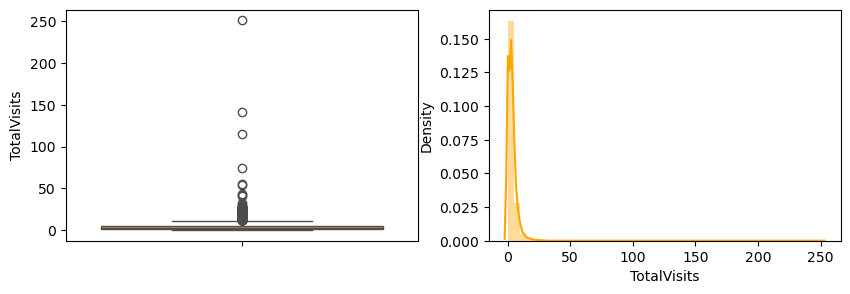

In [65]:
visualize_numbers_data(df_leads['TotalVisits'], color='orange')      

- Total visits: Above charts showing that there are outliers
- Decision: we need to handle this outliers and right skewed data. We can do transformation with Log10 to achieve this 

In [66]:
df_leads['TotalVisits'].quantile([0.9, 0.95, 0.98, 0.99, 1]) 

0.90      7.0
0.95     10.0
0.98     13.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

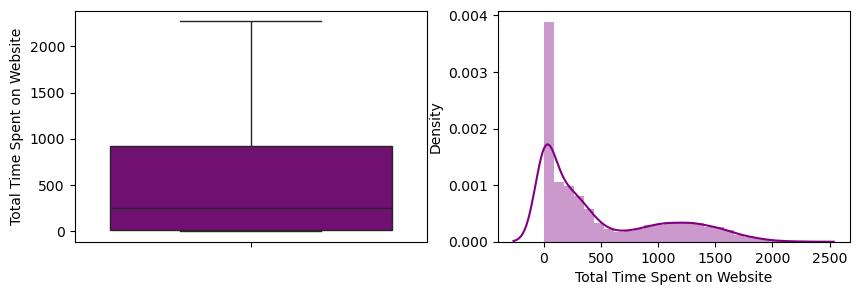

In [67]:
visualize_numbers_data(df_leads['Total Time Spent on Website'], color='purple')       

- Total Time Spent on Website: the data is skewed on the right side 

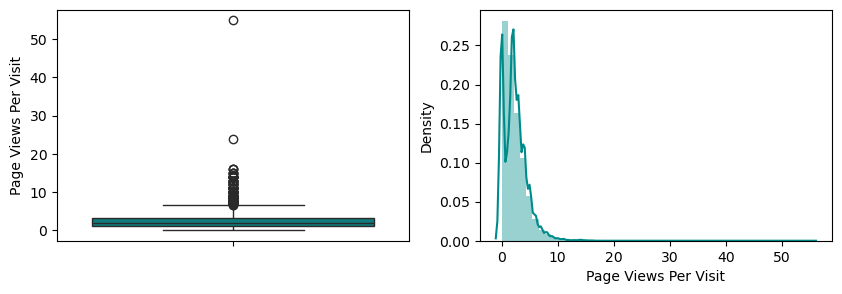

In [68]:
visualize_numbers_data(df_leads['Page Views Per Visit'], color='darkcyan')        

In [69]:
df_leads['Page Views Per Visit'].quantile([0.9, 0.95, 0.98, 0.99, 1]) 

0.90     5.0
0.95     6.0
0.98     8.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

- Page Views Per Visit: Above charts showing the outliers data 

### 3.2 Categorical columns 

In [70]:
def visualize_categorical (feature, target): 
    plt.figure(figsize=[13, 3])

    # 1. Plotting group counts 
    plt.subplot(1, 3, 1)
    cnt_plot =  sns.countplot(data=df_leads, x=feature, hue=target) 
    cnt_plot.set_xticklabels(cnt_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

    # 2.1 Calculate percentage in each group 
    df_grouped_pct = df_leads.groupby(by=feature)[target].value_counts(normalize=True)*100 
    df_grouped_pct = df_grouped_pct.reset_index() 
    df_grouped_pct.columns = [feature, target, 'Percent'] 

    # 2.2 Plotting percentage 
    plt.subplot(1, 3, 2)
    pct_plot = sns.barplot(data=df_grouped_pct, x=feature, y='Percent', hue=target)
    pct_plot.set_xticklabels(pct_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

    # 3. Plotting percentage of total
    plt.subplot(1, 3, 3)
    sns.countplot(data=df_leads, x=target, palette='tab10', stat='percent') 

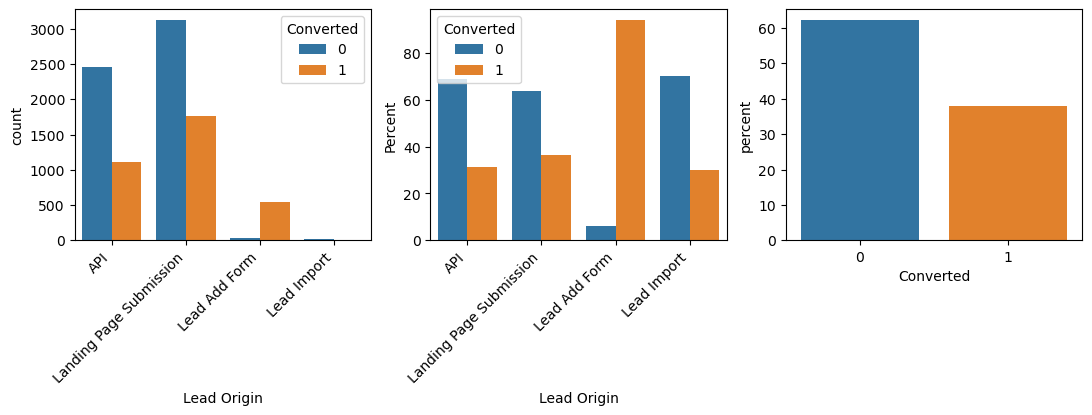

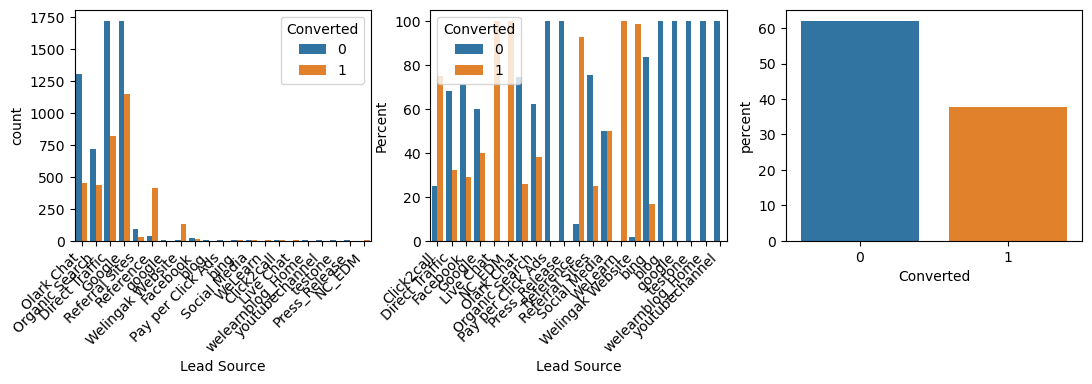

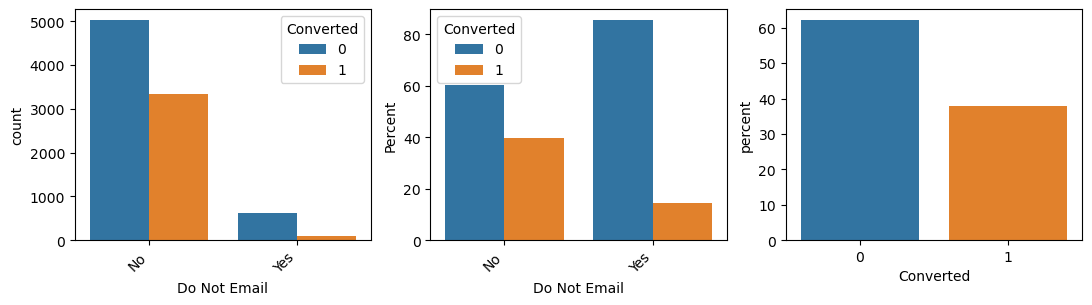

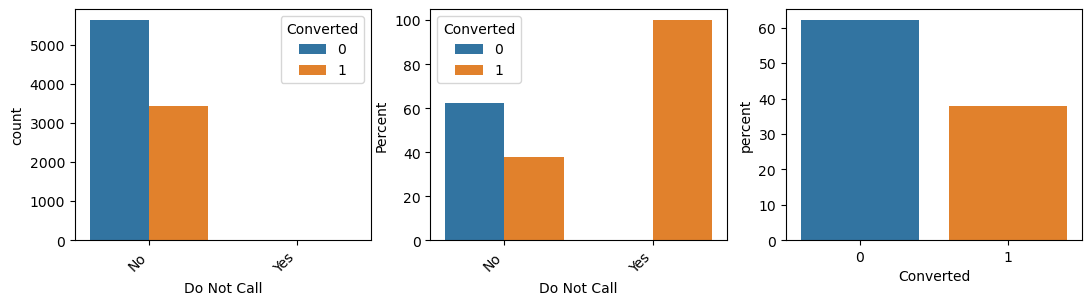

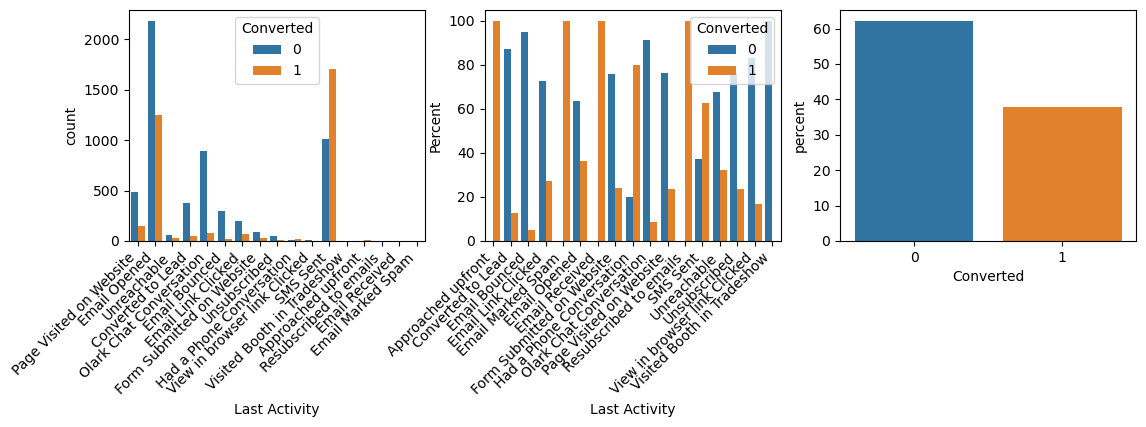

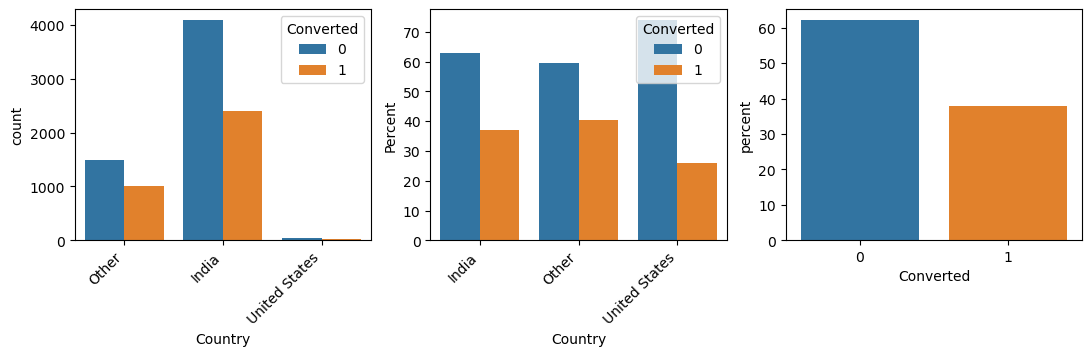

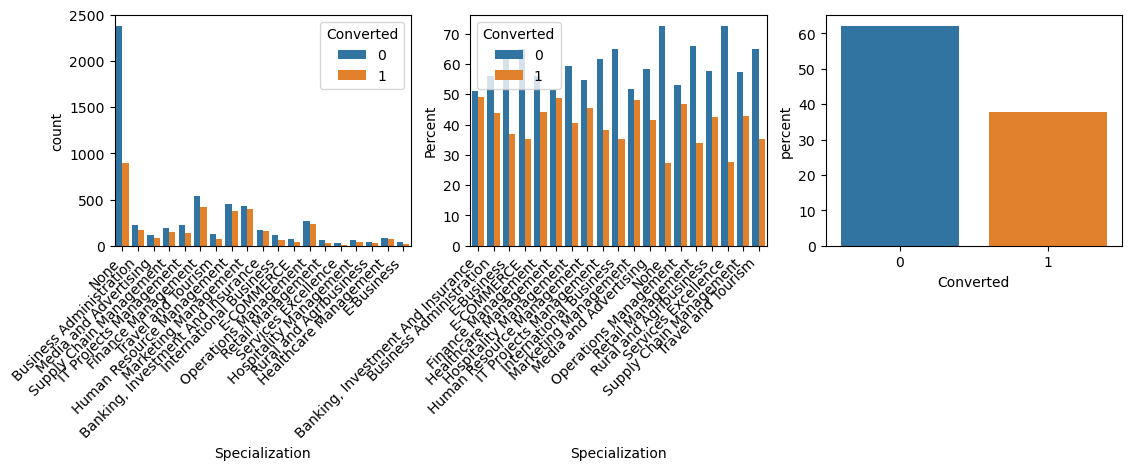

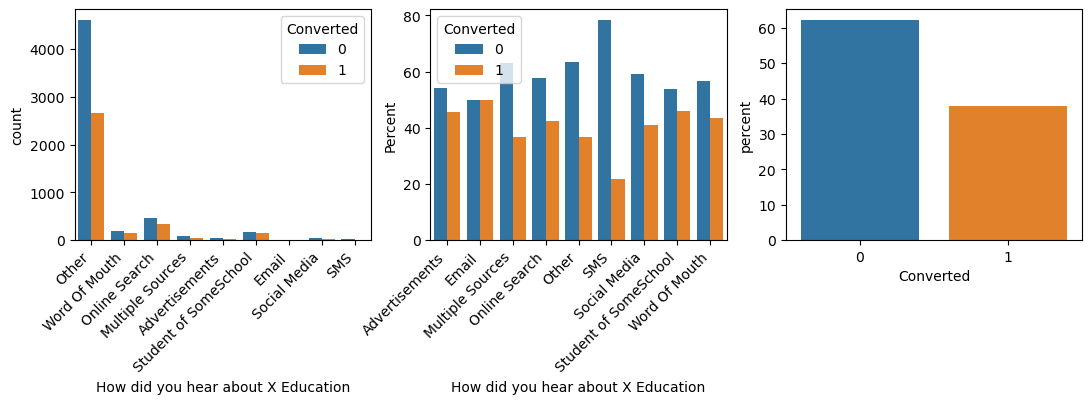

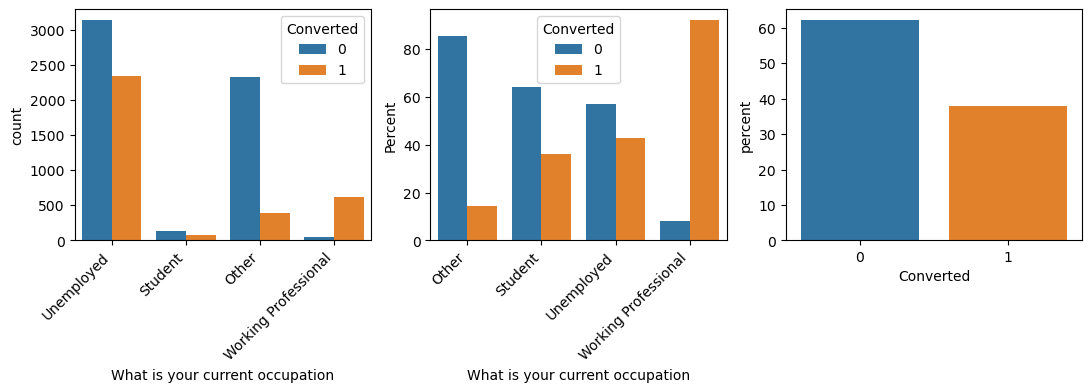

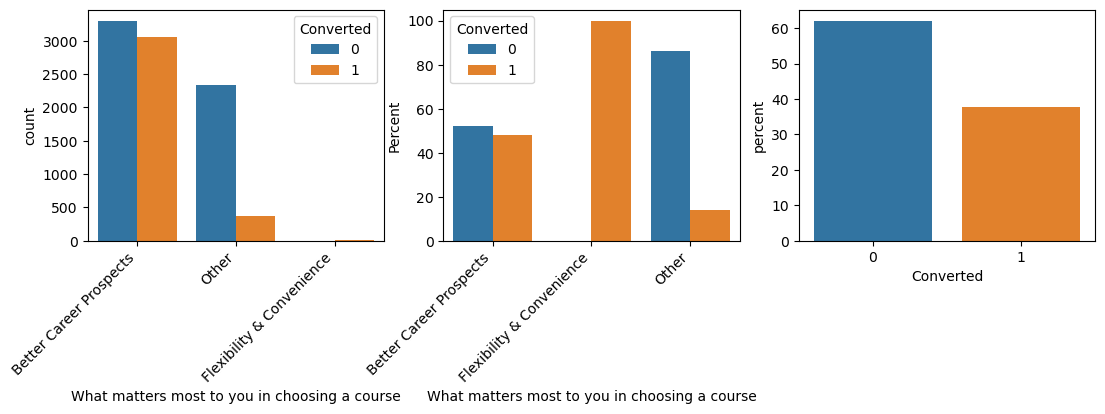

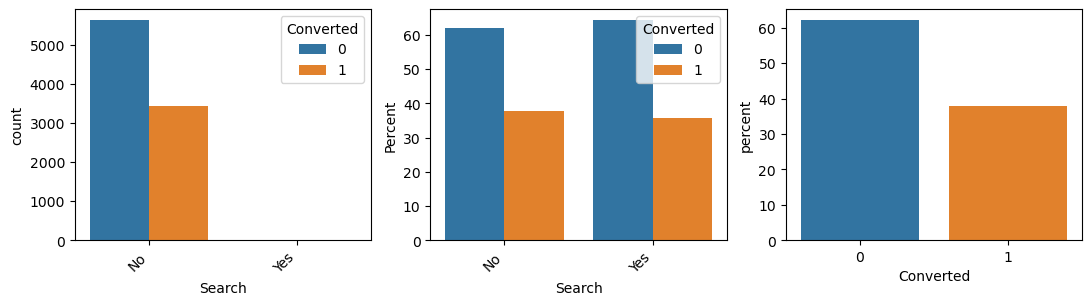

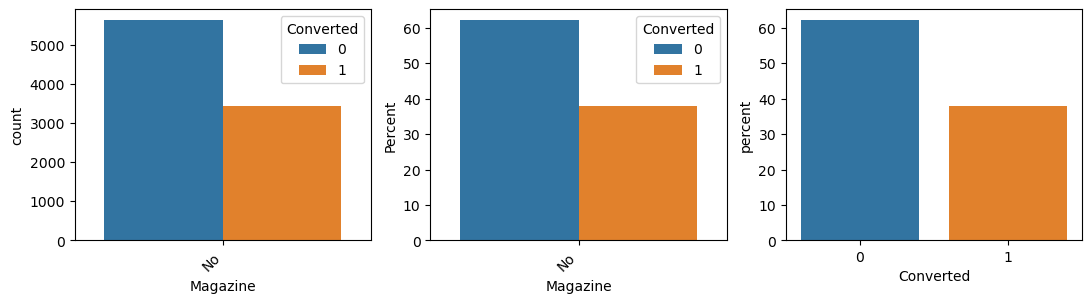

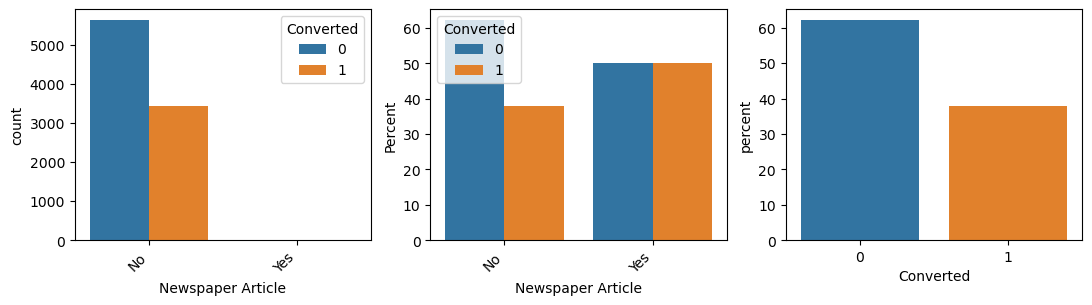

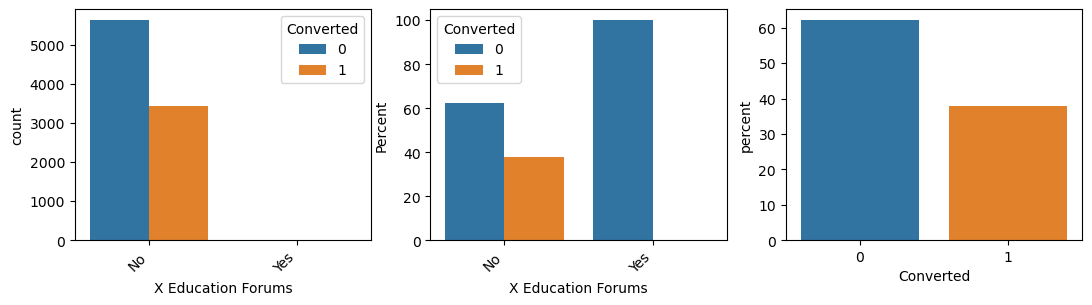

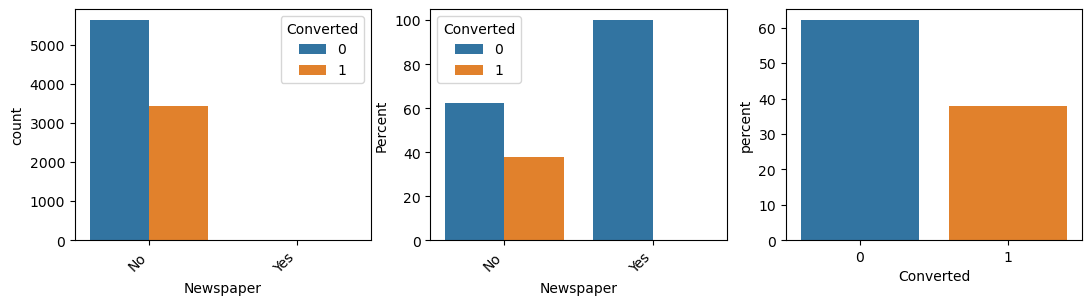

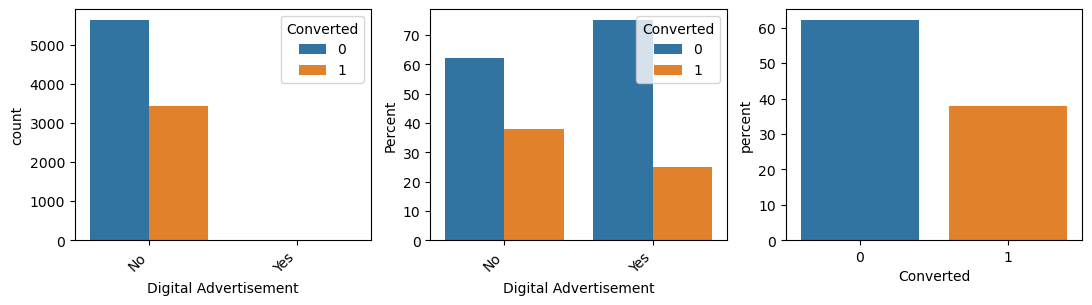

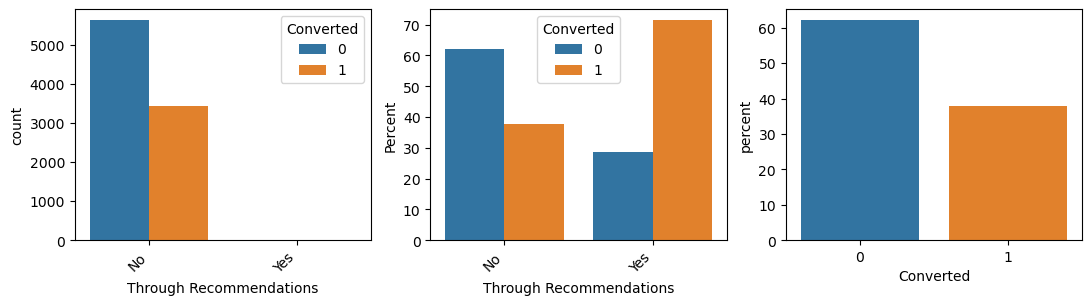

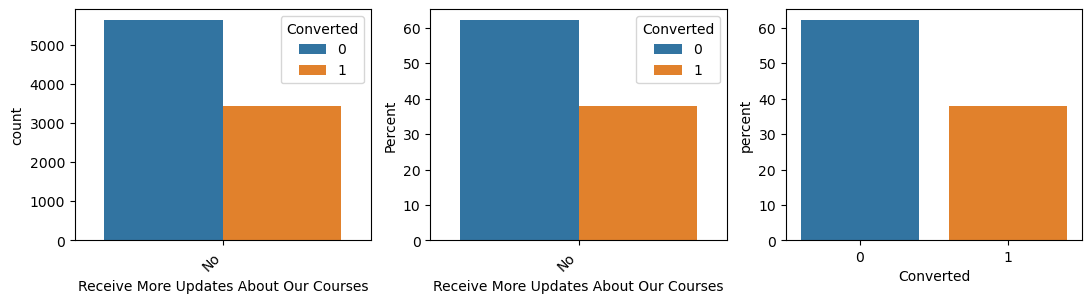

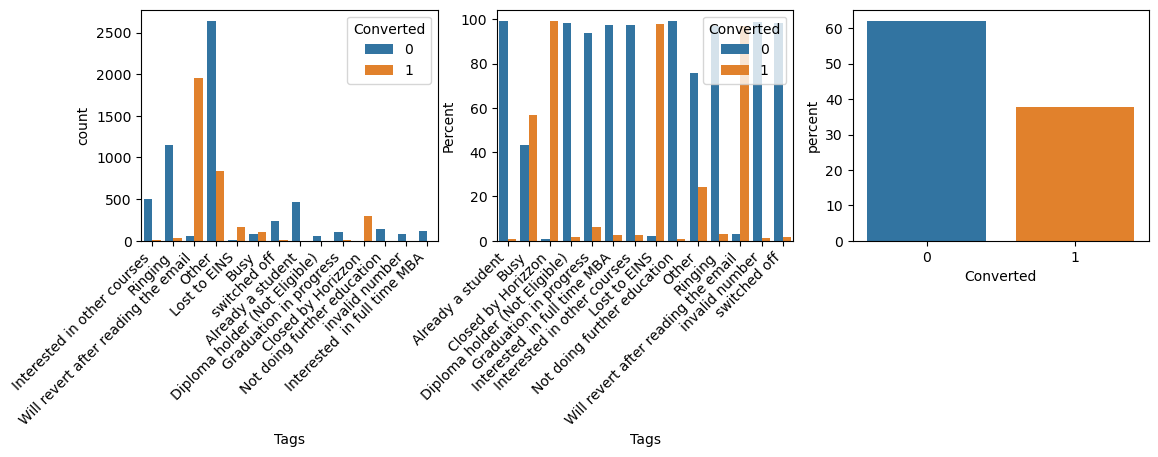

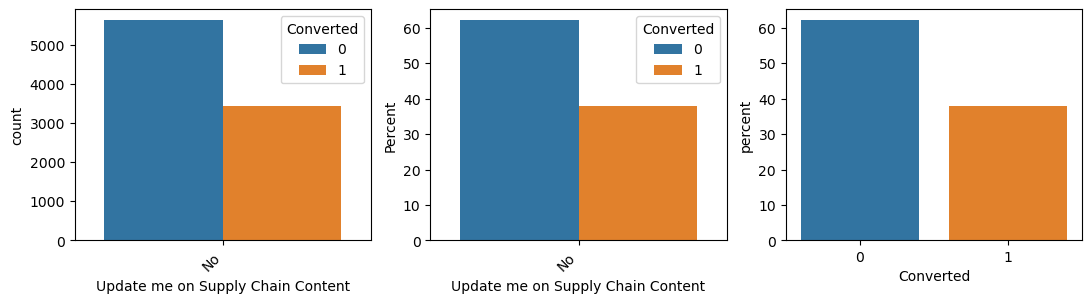

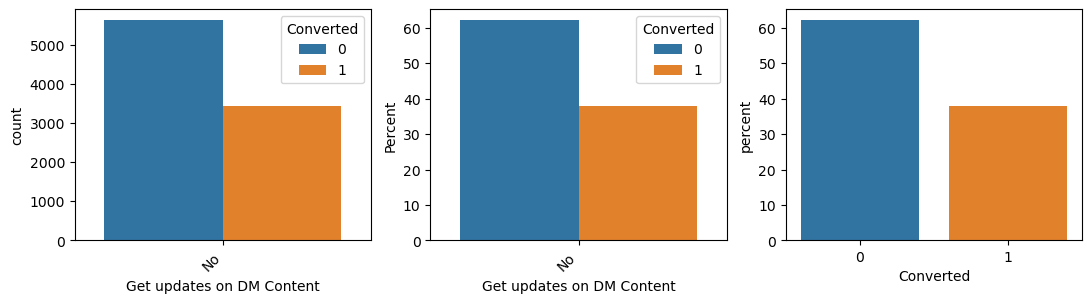

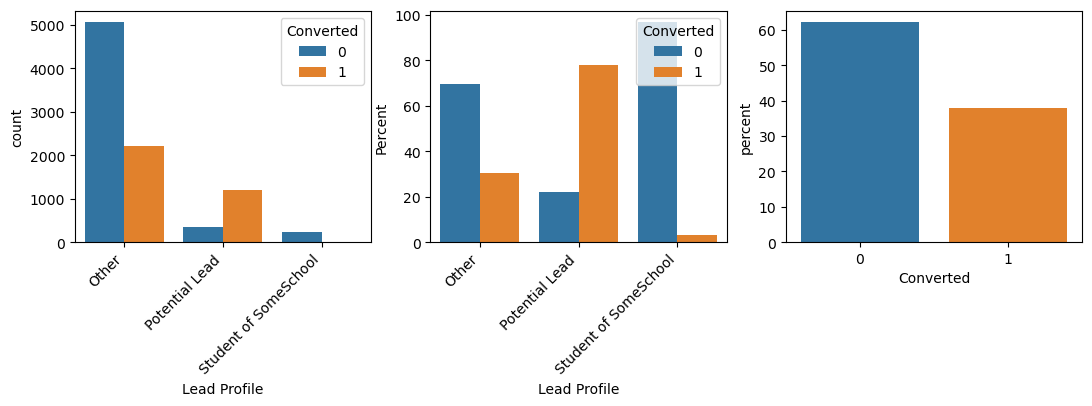

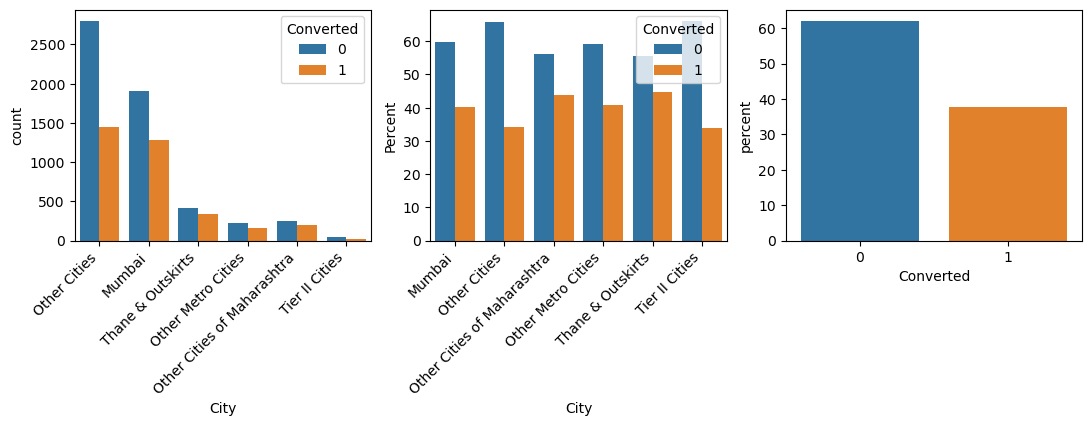

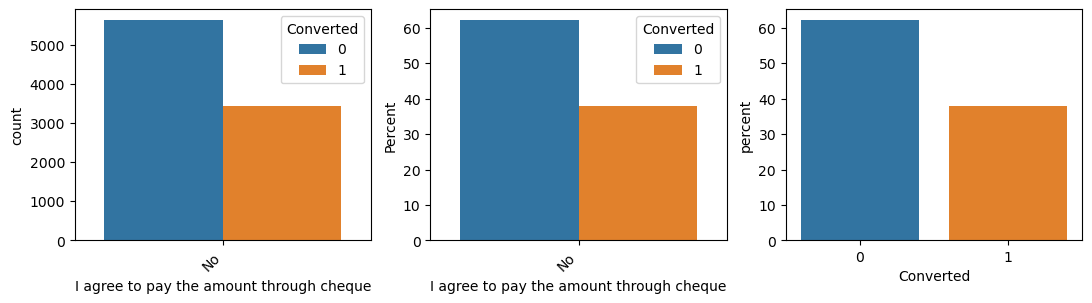

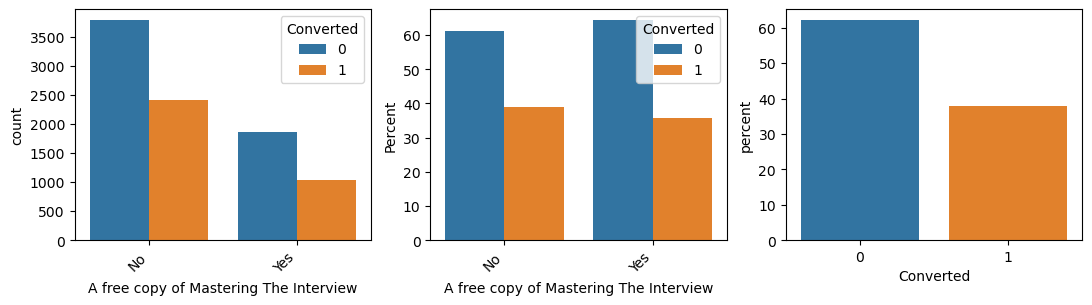

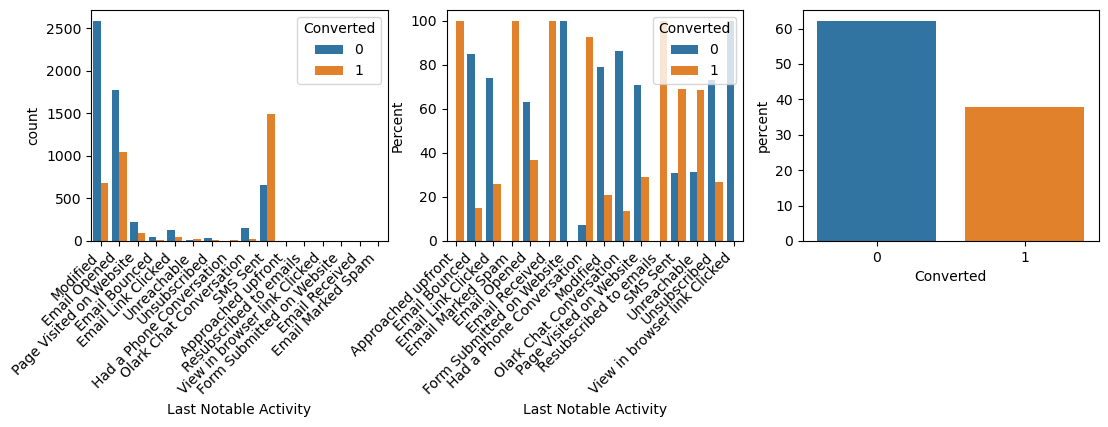

In [71]:
for col in df_leads.dtypes[df_leads.dtypes=='object'].index: 
    visualize_categorical(feature=col, target='Converted') 

### 3.3 Correlation Heatmap 

<Axes: >

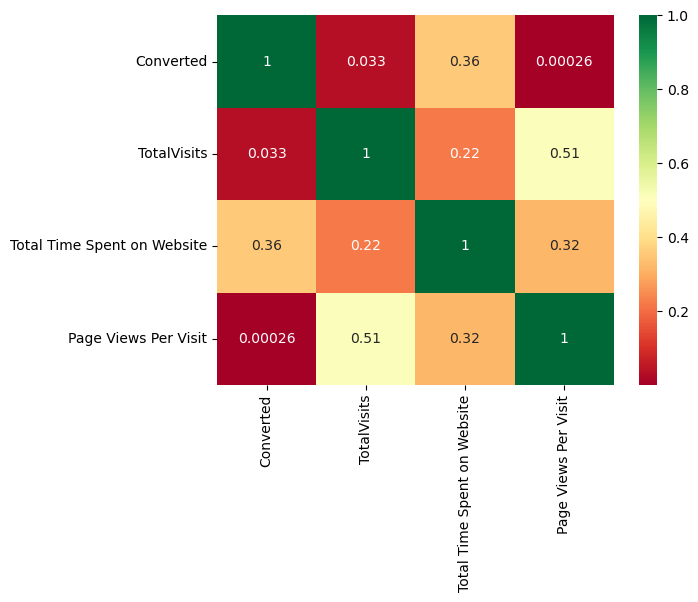

In [72]:
# correlations 
corr = df_leads[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr() 
sns.heatmap(corr,annot=True,cmap='RdYlGn')   


## 4. Data Transformation (Part 2 - After Visualization) 

### 4.1 Outliers 

#### Field 1: TotalVisits 

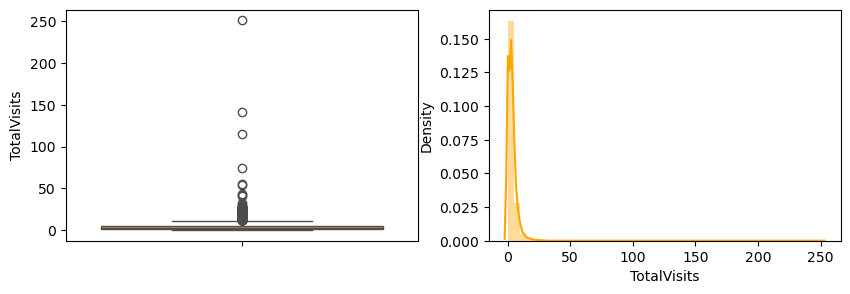

In [73]:
# Before handling outliers 
visualize_numbers_data(df_leads['TotalVisits'], color='orange')      

In [74]:
df_leads['TotalVisits'].quantile([0.95, 0.98, 0.99, 1.0])

0.95     10.0
0.98     13.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

- Remarks: The max value is far away from 0.99 quantile value, we can drop these datapoints. 

In [75]:
# Check numbers of outlier datapoints 
df_leads[df_leads['TotalVisits']>df_leads['TotalVisits'].quantile(0.99)].shape 

(83, 30)

In [76]:
# Drop outliers datapoints 
df_leads =  df_leads[~(df_leads['TotalVisits']>df_leads['TotalVisits'].quantile(0.99))]  

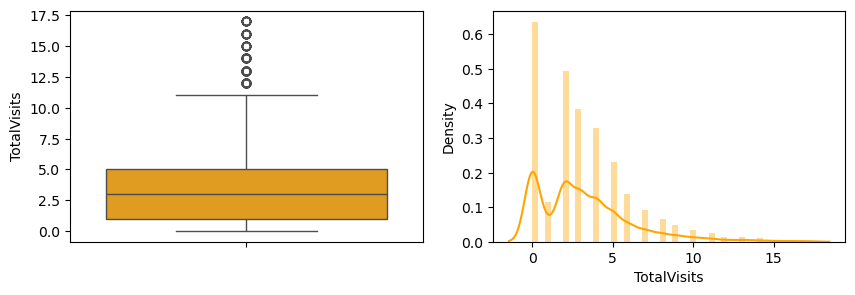

In [77]:
# After handling outliers 
visualize_numbers_data(df_leads['TotalVisits'], color='orange')      

#### Field 2: Page Views Per Visit 

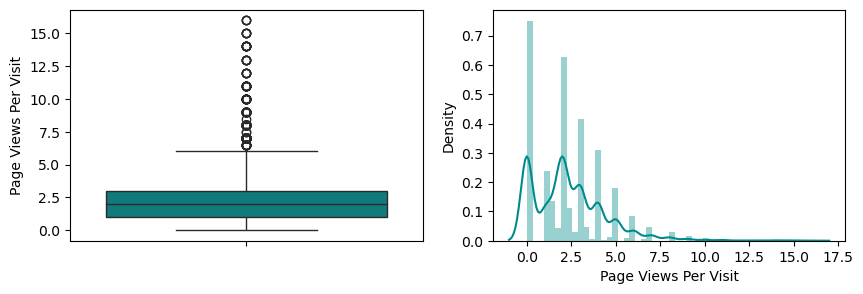

In [78]:
# Before handling the outliers 
visualize_numbers_data(df_leads['Page Views Per Visit'], color='darkcyan')        

In [79]:
df_leads['Page Views Per Visit'].quantile([0.9, 0.95, 0.98, 0.99, 1]) 

0.90     5.0
0.95     6.0
0.98     8.0
0.99     9.0
1.00    16.0
Name: Page Views Per Visit, dtype: float64

In [80]:
df_leads[df_leads['Page Views Per Visit']>df_leads['Page Views Per Visit'].quantile(0.99)].shape  

(67, 30)

In [81]:
df_leads = df_leads[~(df_leads['Page Views Per Visit']>df_leads['Page Views Per Visit'].quantile(0.99))]  

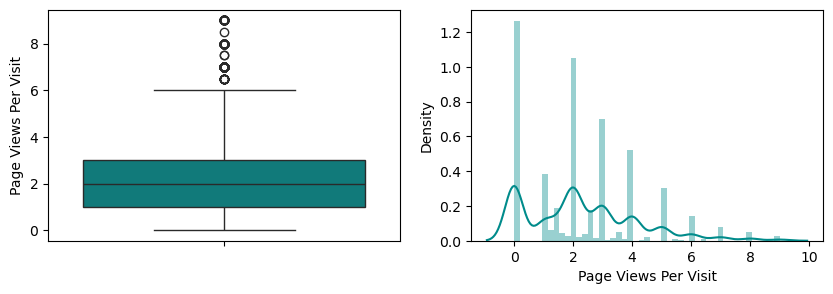

In [82]:
# After handling the outliers 
visualize_numbers_data(df_leads['Page Views Per Visit'], color='darkcyan')        

### 4.2 Encoding binary categorical 
1. Do Not Email
2. Do Not Call
3. Search
4. Magazine (No only)
5. Newspaper Article
6. X Education Forums
7. Newspaper
8. Digital Advertisement
9. Through Recommendations
10. Receive More Updates About Our Courses
11. Update me on Supply Chain Content
12. Get updates on DM Content
13. I agree to pay the amount through cheque
14. A free copy of Mastering The Interview 

In [83]:
col_yes_no = [
    'Do Not Email', 
    'Do Not Call', 
    'Search', 
    'Magazine',  
    'Newspaper Article', 
    'X Education Forums', 
    'Newspaper', 
    'Digital Advertisement', 
    'Through Recommendations', 
    'Receive More Updates About Our Courses', 
    'Update me on Supply Chain Content', 
    'Get updates on DM Content', 
    'I agree to pay the amount through cheque', 
    'A free copy of Mastering The Interview'
]

mapping = {
    'Yes': 1, 
    'No': 0
}

df_leads[col_yes_no] =  df_leads[col_yes_no].applymap(lambda x: mapping[x])  

In [84]:
df_leads.head() 

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website   Other                     None   
1             Email Opened   India                     None   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                     None   

  How did you hear about X Education What is your current occupation  \
0                              Other                      Unemployed   
1                              Other                      Unemployed   
2                              Other                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags  Update me on Supply Chain Content  \
0          Interested in other courses                                  0   
1                              Ringing                                  0   
2  Will revert after reading the email                                  0   
3                              Ringing                                  0   
4  Will revert after reading the email                                  0   

   Get updates on DM Content    Lead Profile          City  \
0                          0           Other  Other Cities   
1                          0           Other  Other Cities   
2                          0  Potential Lead        Mumbai   
3                          0           Other        Mumbai   
4                          0           Other        Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2

### 4.3 Encoding with dummy variable 

#### 4.3.1 Auto dropping first dummy var  
1. Lead Origin
2. Lead Source
3. Last Activity
4. Last Notable Activity

In [85]:
# cols to create dummy vars
cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']     

# Generate dummy vars 
dummy = pd.get_dummies(df_leads[cols], dtype=int, drop_first=True) 
df_leads = pd.concat([df_leads, dummy], axis='columns')

# Drop the old columns 
df_leads = df_leads.drop(columns=cols)  

In [86]:
df_leads.head()  

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit Country  \
0                            0                   0.0   Other   
1                          674                   2.5   India   
2                         1532                   2.0   India   
3                          305                   1.0   India   
4                         1428                   1.0   India   

            Specialization How did you hear about X Education  \
0                     None                              Other   
1                     None                              Other   
2  Business Administration                              Other   
3    Media and Advertising                      Word Of Mouth   
4                     None                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags  Update me on Supply Chain Content  \
0          Interested in other courses                                  0   
1                              Ringing                                  0   
2  Will revert after reading the email                                  0   
3                              Ringing                                  0   
4  Will revert after reading the email                                  0   

   Get updates on DM Content    Lead Profile          City  \
0                          0           Other  Other Cities   
1                          0           Other  Other Cities   
2                          0  Potential Lead        Mumbai   
3                          0           Other        Mumbai   
4                          0           Other        Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                 

#### 4.3.2 Manually dropping selected dummy var 
These fields have the non-meanning value such as Other, None, ... These non-meanning values should be dropped instead of dropping 1st field randomly 
1. Country
2. How did you hear about X Education
3. What is your current occupation
4. What matters most to you in choosing a course
5. Tags
6. Lead Profile
7. City
8. Specialization

In [87]:
def transform_dummy (df, col, drop_value): 
    # Generate dummy vars 
    dummy = pd.get_dummies(df[col], dtype=int, prefix=col) 
    dummy = dummy.drop(columns= col + '_' + drop_value)     # Drop the indicated drop_value from dummy variables 
    df = pd.concat([df, dummy], axis='columns')
    
    # Drop the old original column 
    df = df.drop(columns=col) 

    return df 

In [88]:
df_leads['City'].value_counts() 

City
Other Cities                   4222
Mumbai                         3107
Thane & Outskirts               722
Other Cities of Maharashtra     437
Other Metro Cities              364
Tier II Cities                   72
Name: count, dtype: int64

In [89]:
df_leads = transform_dummy(df_leads, 'Country', 'Other') 
df_leads = transform_dummy(df_leads, 'How did you hear about X Education', 'Other') 
df_leads = transform_dummy(df_leads, 'What is your current occupation', 'Other') 
df_leads = transform_dummy(df_leads, 'What matters most to you in choosing a course', 'Other') 
df_leads = transform_dummy(df_leads, 'Tags', 'Other') 
df_leads = transform_dummy(df_leads, 'Lead Profile', 'Other') 
df_leads = transform_dummy(df_leads, 'City', 'Other Cities') 
df_leads = transform_dummy(df_leads, 'Specialization', 'None') 

df_leads.head() 

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
0                            0                   0.0       0         0   
1                          674                   2.5       0         0   
2                         1532                   2.0       0         0   
3                          305                   1.0       0         0   
4                         1428                   1.0       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0           

In [90]:
df_leads.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 8924 entries, 0 to 9239
Data columns (total 125 columns):
 #    Column                                                                   Non-Null Count  Dtype  
---   ------                                                                   --------------  -----  
 0    Do Not Email                                                             8924 non-null   int64  
 1    Do Not Call                                                              8924 non-null   int64  
 2    Converted                                                                8924 non-null   int64  
 3    TotalVisits                                                              8924 non-null   float64
 4    Total Time Spent on Website                                              8924 non-null   int64  
 5    Page Views Per Visit                                                     8924 non-null   float64
 6    Search                                                             

<Axes: >

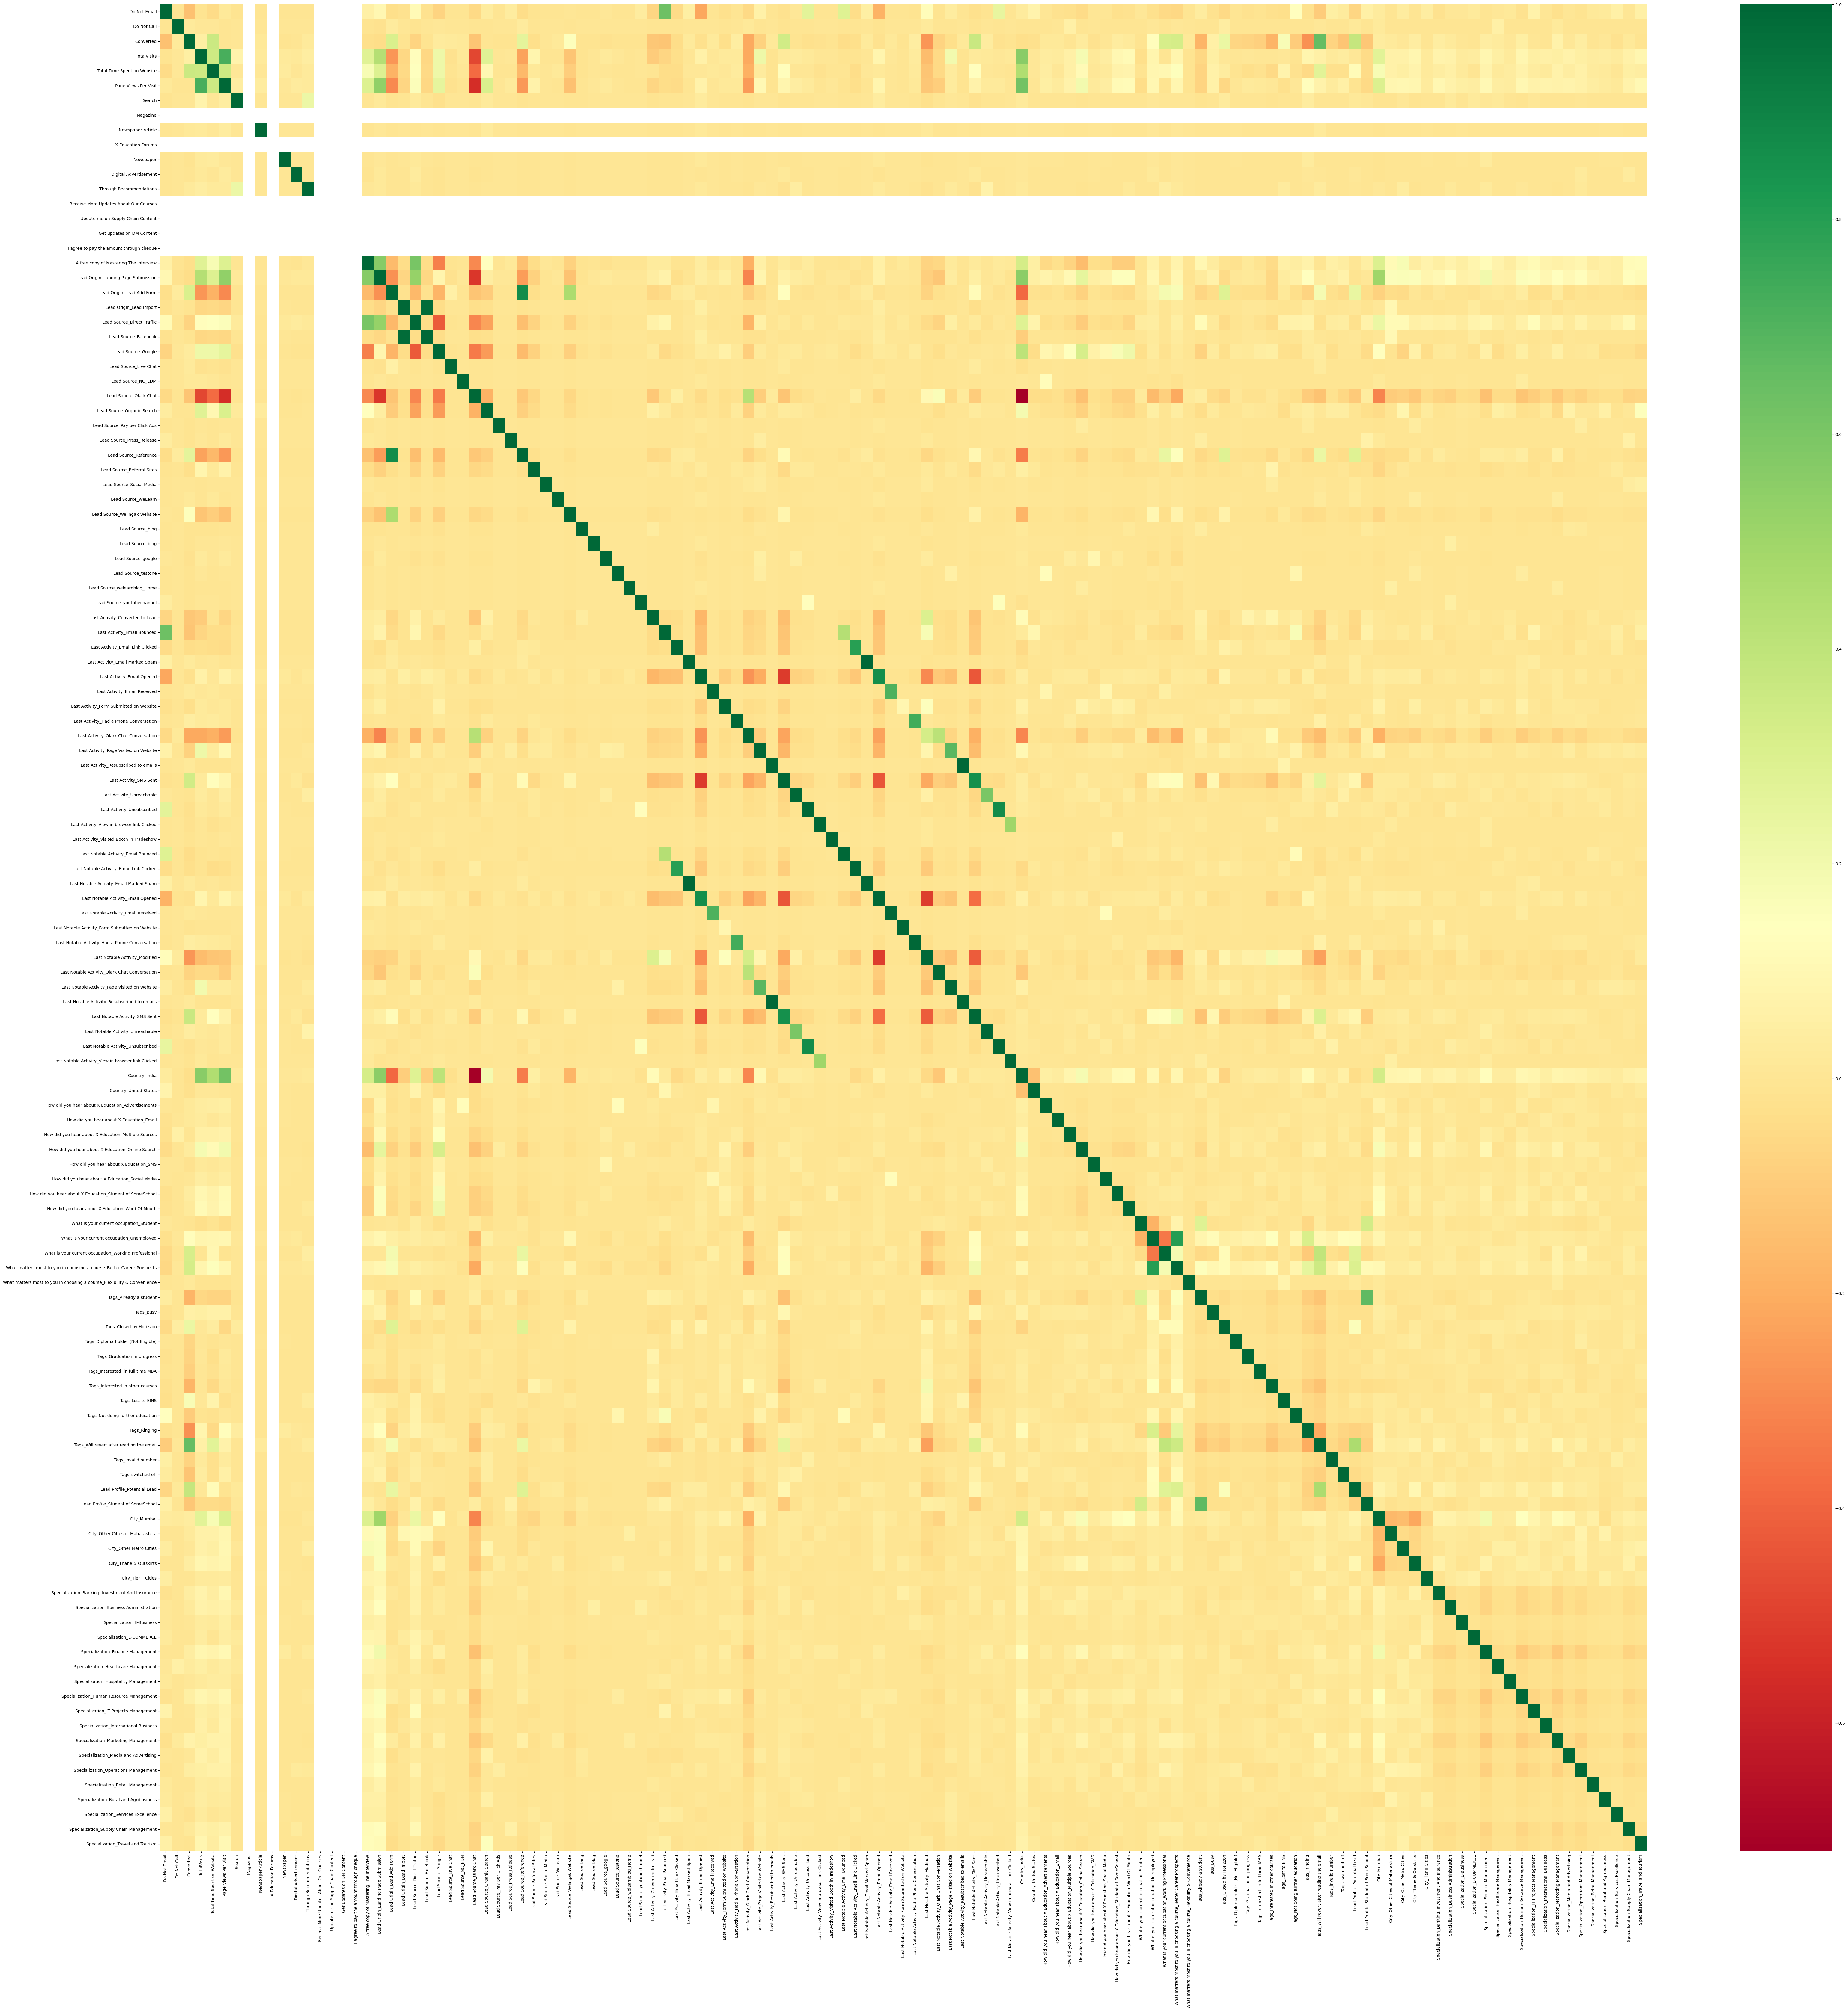

In [91]:
corr = df_leads.corr() 

plt.figure(figsize=[80,80])
sns.heatmap(data=corr,cmap='RdYlGn') 

## 5. Build the model 

### 5.1 Check imbalance dataset 

In [92]:
# Ratio of converted/total records 
print('ratio=', sum(df_leads['Converted'])/df_leads.shape[0]) 

ratio= 0.3775212909009413


- Conclusion: The ratio is quite big. So dataset is not imbalance 

### 5.2 Create X and y 

In [93]:
# 1. Create feature and target variables 
y = df_leads['Converted'] 
X = df_leads.drop(columns=['Converted']) 

print('Full dataset:', df_leads.shape)
print('Target size: ', y.shape) 
print('Feature size:', X.shape)

Full dataset: (8924, 125)
Target size:  (8924,)
Feature size: (8924, 124)


### 5.3 Split TRAIN-TEST dataset 

In [94]:
from sklearn.model_selection import train_test_split 

In [95]:
# 2. Split train-test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('\nX_test: ', X_test.shape)
print('y_test:  ', y_test.shape) 

X_train: (6246, 124)
y_train: (6246,)

X_test:  (2678, 124)
y_test:   (2678,)


### 5.4 [TRAIN] Scale the numeric features 
- StandardScaler: Preferred for algorithms that assume normally distributed data, such as linear models and Gaussian Naive Bayes.
- MinMaxScaler: Often used in algorithms that are sensitive to the scale of input data but do not assume any specific distribution, such as neural networks and distance-based algorithms like K-Nearest Neighbors.
- So in this case, we will use StandardScaler for logistic regression (Linear Model)

In [96]:
from sklearn.preprocessing import StandardScaler  


<Axes: ylabel='Page Views Per Visit'>

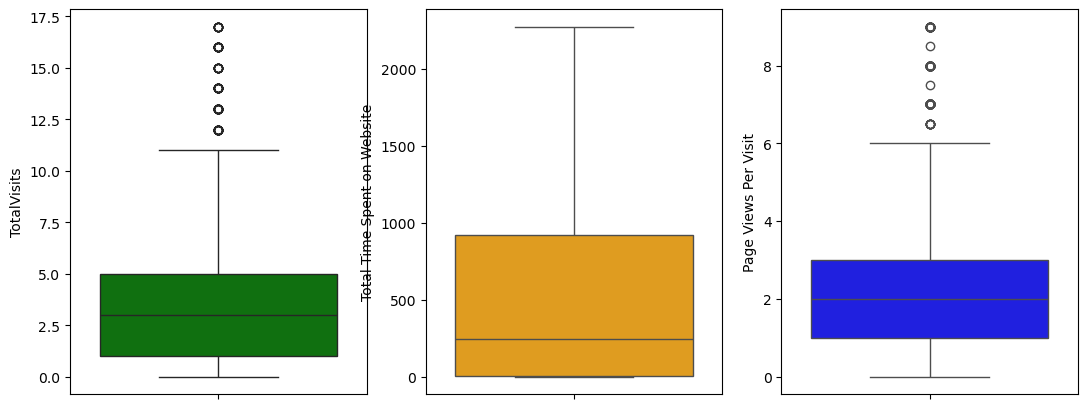

In [97]:
# Before scaling 
plt.figure(figsize=[13, 5])

plt.subplot(1, 3, 1)
sns.boxplot(X_train['TotalVisits'], color='green') 

plt.subplot(1, 3, 2)
sns.boxplot(X_train['Total Time Spent on Website'], color='orange') 

plt.subplot(1, 3, 3)
sns.boxplot(X_train['Page Views Per Visit'], color='blue') 

In [98]:
# 3. Scale the numeric 
cols = ['TotalVisits',	'Total Time Spent on Website',	'Page Views Per Visit'] 

scaler = StandardScaler() 
X_train[cols] = scaler.fit_transform(X_train[cols])


<Axes: ylabel='Page Views Per Visit'>

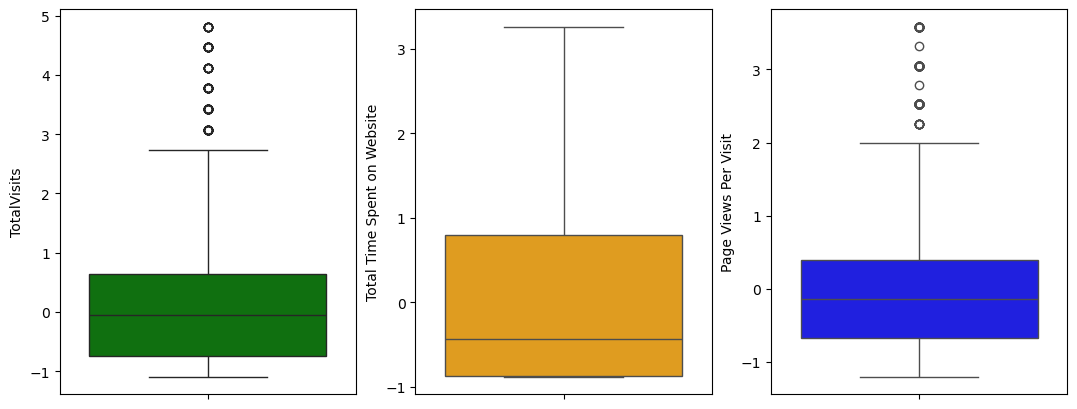

In [99]:
# After scaling 
plt.figure(figsize=[13, 5])

plt.subplot(1, 3, 1)
sns.boxplot(X_train['TotalVisits'], color='green') 

plt.subplot(1, 3, 2)
sns.boxplot(X_train['Total Time Spent on Website'], color='orange') 

plt.subplot(1, 3, 3)
sns.boxplot(X_train['Page Views Per Visit'], color='blue') 

In [100]:
# Check feature values after applying scaling 
X_train.head() 

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
6676             0            0    -0.049636                     1.395668   
6138             0            0     0.297929                     0.609686   
8650             0            0    -0.049636                     1.178657   
3423             0            0    -1.092332                    -0.878390   
6552             0            0    -1.092332                    -0.878390   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
6676              0.395289       0         0                  0   
6138              0.926758       0         0                  0   
8650              0.395289       0         0                  0   
3423             -1.199117       0         0                  0   
6552             -1.199117       0         0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
6676                   0          0                      0   
6138                   0          0                      0   
8650                   0          0                      0   
3423                   0          0                      0   
6552                   0          0                      0   

      Through Recommendations  Receive More Updates About Our Courses  \
6676                        0                                       0   
6138                        0                                       0   
8650                        0                                       0   
3423                        0                                       0   
6552                        0                                       0   

      Update me on Supply Chain Content  Get updates on DM Content  \
6676                                  0                          0   
6138                                  0                          0   
8650                                  0                          0   
3423                                  0                          0   
6552                                  0                          0   

      I agree to pay the amount through cheque  \
6676                                         0   
6138                                         0   
8650                                         0   
3423                                         0   
6552                                         0   

      A free copy of Mastering The Interview  \
6676                                       0   
6138                                       0   
8650                                       1   
3423                                       0   
6552                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6676                                    1                          0   
6138                                    1                          0   
8650                                    1                          0   
3423                                    0                          0   
6552                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
6676                        0                           1   
6138                        0                           0   
8650                        0                           1   
3423                        0                           0   
6552                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
6676                     0                   0                      0   
6138                     0                   1                      0   
8650                     0                   0                      0   
3423                     0                   0                      0   
6552                     0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  

In [101]:
X_test[cols] = scaler.transform(X_test[cols])

### 5.6 [TRAIN] Feature Elimination (RFE and manual)

#### Common Function: eliminate_rfe_logistic 

In [102]:
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE 

def eliminate_rfe_logistic (X_train, y_train, n_feature_to_select): 

    # 1. [LogisticRegression] Create instance and train the model 
    classifier = LogisticRegression() 
    classifier.fit(X_train, y_train)

    # 2. [RFE] Create RFE instance and eliminate features (fit) 
    rfe = RFE(estimator=classifier, n_features_to_select=n_feature_to_select)
    rfe.fit(X_train, y_train)

    # 3. Consolidate selected features
    rfe_features = pd.DataFrame({
    'feature': X_train.columns, 
    'support': rfe.support_, 
    'ranking': rfe.ranking_
    })

    rfe_selected_features = rfe_features[rfe_features.ranking==1]['feature'].to_list() 

    return rfe, rfe_selected_features 

In [103]:
# Testing rfe common function 
rfe, rfe_selected_features = eliminate_rfe_logistic(X_train, y_train, n_feature_to_select=0.5)

len(rfe_selected_features) 

62

#### Common Function: build_logistic_sm  

In [104]:
import statsmodels.api as sm 

In [105]:
# INPUT: TRAIN dataset (y, X)
# OUTPUT: Logistic Regression result and statistical intepretable 
#         p-value(field) > 0.05: the field is insignificant, need to be removed 

def build_logistic_sm (y_train, X_train): 
    # 1. Add constant feature, prepare for statsmodel algorithm 
    X_train_sm = sm.add_constant(X_train, prepend=False) 
    
    # 2. Create Logistic Regression model 
    sm_logistic = sm.GLM(y_train, X_train_sm, sm.families.Binomial())  

    # 3. Train/Fit the model 
    sm_logistic_result = sm_logistic.fit() 
    
    return sm_logistic_result 

#### Common Function: predict_logistic_sm 

In [106]:
def predict_logistic_sm(sm_fitted, X): 
    # 1. Add constant feature 
    X_sm = sm.add_constant(X, prepend=False) 

    # 2. Predict 
    y_pred = sm_fitted.predict(X_sm)
    
    return y_pred 

#### 5.6.1 Round 1: RFE 0.5 and Inteprete with SM model 

In [107]:
# 1. Run RFE for eliminate features 
rfe, rfe_selected_features = eliminate_rfe_logistic(X_train, y_train, n_feature_to_select=0.5)

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[rfe_selected_features])

# 3. View model result 
sm_logistic_fitted.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6183
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1086.5
Date:                Wed, 23 Oct 2024   Deviance:                       2173.0
Time:                        13:07:45   Pearson chi2:                 1.00e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6249
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.2117      0.323     -3.754      0.000      -1.844      -0.579
TotalVisits                                                               0.2467      0.084      2.951      0.003       0.083       0.411
Total Time Spent on Website                                               1.0797      0.068     15.992      0.000       0.947       1.212
Page Views Per Visit                                                     -0.3133      0.097     -3.222      0.001      -0.504      -0.123
Digital Advertisement                                                    -1.7581      2.282     -0.771      0.441      -6.230       2.714
Lead Origin_Landing Page Submission                                      -0.5086      0.170     -2.985      0.003      -0.843      -0.175
Lead Origin_Lead Add Form                                                -0.5604      1.166     -0.481      0.631      -2.846       1.725
Lead Source_Facebook                                                     -0.8406      0.772     -1.090      0.276      -2.353       0.672
Lead Source_Olark Chat                                                    0.4938      0.313      1.578      0.115      -0.119       1.107
Lead Source_Reference                                                     0.8815      1.229      0.717      0.473      -1.527       3.290
Lead Source_Referral Sites                                               -0.3964      0.506     -0.784      0.433      -1.387       0.595
Lead Source_Welingak Website                                              4.0259      1.372      2.935      0.003       1.338       6.714
Last Activity_Converted to Lead                                          -1.0011      0.402     -2.491      0.013      -1.789      -0.214
Last Activity_Email Bounced                                              -1.0630      0.855     -1.244      0.214      -2.738       0.612
Last Activity_Had a Phone Conversation                                    3.6299      1.918      1.893      0.058      -0.129       7.389
Last Activity_Olark Chat Conversation                                    -0.9408      0.332     -2.833      0.005      -1.592      -0.290
Last Activity_Page Visited on Website                                    -0.7179      0.271     -2.647      0.008      -1.249      -0.186
Last Activity_SMS Sent                                                    1.1266      0.282      4.000      0.000       0.575       1.679
Last Activity_Unsubscribed                                                0.1080      1.829      0.059      0.953      -3.477       3.693
Last Notable Activity_Email Bounced            

- Remarks: 35/63 features are insignificant (p-Value>0.5). It is still too many insignificate feature, we need to eliminate more. So we will run RFE to eliminate 40% features 

#### 5.6.2 Round 2: RFE 0.4 and Inteprete with SM model 

In [108]:
# 1. Run RFE for eliminate features 
rfe, rfe_selected_features = eliminate_rfe_logistic(X_train, y_train, n_feature_to_select=0.4)

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[rfe_selected_features])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6196
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1098.5
Date:                Wed, 23 Oct 2024   Deviance:                       2196.9
Time:                        13:07:49   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6234
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.2303      0.314     -3.919      0.000      -1.846      -0.615
Total Time Spent on Website                                               1.0705      0.066     16.319      0.000       0.942       1.199
Digital Advertisement                                                    -2.0174      2.223     -0.907      0.364      -6.375       2.340
Lead Origin_Landing Page Submission                                      -0.5543      0.151     -3.663      0.000      -0.851      -0.258
Lead Origin_Lead Add Form                                                 0.6266      0.420      1.493      0.135      -0.196       1.449
Lead Source_Olark Chat                                                    0.8958      0.180      4.989      0.000       0.544       1.248
Lead Source_Welingak Website                                              3.2477      0.837      3.879      0.000       1.607       4.889
Last Activity_Converted to Lead                                          -0.9736      0.404     -2.412      0.016      -1.764      -0.183
Last Activity_Email Bounced                                              -0.9779      0.852     -1.147      0.251      -2.648       0.692
Last Activity_Had a Phone Conversation                                    3.6076      2.056      1.754      0.079      -0.423       7.638
Last Activity_Olark Chat Conversation                                    -0.8454      0.331     -2.551      0.011      -1.495      -0.196
Last Activity_Page Visited on Website                                    -0.5703      0.265     -2.150      0.032      -1.090      -0.050
Last Activity_SMS Sent                                                    1.2024      0.280      4.294      0.000       0.654       1.751
Last Activity_Unsubscribed                                                0.3113      1.938      0.161      0.872      -3.486       4.109
Last Notable Activity_Email Bounced                                       1.0249      1.104      0.928      0.353      -1.139       3.189
Last Notable Activity_Email Link Clicked                                 -1.0582      0.432     -2.447      0.014      -1.906      -0.211
Last Notable Activity_Modified                                           -0.9663      0.210     -4.592      0.000      -1.379      -0.554
Last Notable Activity_Olark Chat Conversation                            -1.0734      0.561     -1.912      0.056      -2.174       0.027
Last Notable Activity_SMS Sent                                            0.8810      0.308      2.863      0.004       0.278       1.484
Last Notable Activity_Unreachable              

- Remarks: 23/50 features are insignificant (p-Value>0.5). It is still too many insignificate feature, we need to eliminate more. So we will run RFE to eliminate 30% features 

#### 5.6.3 Round 3: RFE 0.3 and Inteprete with SM model 

In [109]:
# 1. Run RFE for eliminate features 
rfe, rfe_selected_features = eliminate_rfe_logistic(X_train, y_train, n_feature_to_select=0.3)

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[rfe_selected_features])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1105.9
Date:                Wed, 23 Oct 2024   Deviance:                       2211.8
Time:                        13:07:53   Pearson chi2:                 9.42e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6225
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.2691      0.313     -4.049      0.000      -1.883      -0.655
Total Time Spent on Website                                               1.0661      0.065     16.391      0.000       0.939       1.194
Lead Origin_Landing Page Submission                                      -0.5040      0.146     -3.449      0.001      -0.790      -0.218
Lead Origin_Lead Add Form                                                 0.7130      0.412      1.731      0.083      -0.094       1.520
Lead Source_Olark Chat                                                    0.8868      0.179      4.948      0.000       0.536       1.238
Lead Source_Welingak Website                                              3.1994      0.834      3.834      0.000       1.564       4.835
Last Activity_Converted to Lead                                          -1.0067      0.401     -2.511      0.012      -1.793      -0.221
Last Activity_Email Bounced                                              -0.4968      0.620     -0.801      0.423      -1.712       0.718
Last Activity_Had a Phone Conversation                                    3.5409      2.024      1.750      0.080      -0.426       7.507
Last Activity_Olark Chat Conversation                                    -0.8628      0.330     -2.614      0.009      -1.510      -0.216
Last Activity_Page Visited on Website                                    -0.5719      0.264     -2.164      0.030      -1.090      -0.054
Last Activity_SMS Sent                                                    1.1767      0.277      4.245      0.000       0.633       1.720
Last Activity_Unsubscribed                                                0.3487      1.860      0.187      0.851      -3.297       3.995
Last Notable Activity_Email Link Clicked                                 -1.1258      0.437     -2.576      0.010      -1.982      -0.269
Last Notable Activity_Modified                                           -0.9582      0.206     -4.653      0.000      -1.362      -0.555
Last Notable Activity_Olark Chat Conversation                            -1.0260      0.557     -1.843      0.065      -2.117       0.065
Last Notable Activity_SMS Sent                                            0.8823      0.304      2.899      0.004       0.286       1.479
Last Notable Activity_Unsubscribed                                        1.2156      2.026      0.600      0.549      -2.756       5.187
What is your current occupation_Working Professional                      0.6142      0.373      1.648      0.099      -0.116       1.345
What matters most to you in choosing a course_B

- Remarks: 11/38 features are insignificant (p-Value>0.5). We can start eliminate the number of features manually.

#### 5.6.4 Round 4: Manual Elimination - Dropping 'Last Activity_Unsubscribed' 

In [110]:
# 1. Drop field "Last Activity_Unsubscribed"
features_list = rfe_selected_features
features_list.remove("Last Activity_Unsubscribed")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1105.9
Date:                Wed, 23 Oct 2024   Deviance:                       2211.8
Time:                        13:07:53   Pearson chi2:                 9.42e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6225
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.2646      0.313     -4.044      0.000      -1.877      -0.652
Total Time Spent on Website                                               1.0661      0.065     16.390      0.000       0.939       1.194
Lead Origin_Landing Page Submission                                      -0.5034      0.146     -3.446      0.001      -0.790      -0.217
Lead Origin_Lead Add Form                                                 0.7127      0.412      1.730      0.084      -0.095       1.520
Lead Source_Olark Chat                                                    0.8869      0.179      4.949      0.000       0.536       1.238
Lead Source_Welingak Website                                              3.1993      0.834      3.834      0.000       1.564       4.835
Last Activity_Converted to Lead                                          -1.0104      0.401     -2.523      0.012      -1.795      -0.225
Last Activity_Email Bounced                                              -0.5033      0.619     -0.813      0.416      -1.717       0.710
Last Activity_Had a Phone Conversation                                    3.5372      2.023      1.748      0.080      -0.428       7.503
Last Activity_Olark Chat Conversation                                    -0.8662      0.330     -2.629      0.009      -1.512      -0.220
Last Activity_Page Visited on Website                                    -0.5738      0.264     -2.173      0.030      -1.091      -0.056
Last Activity_SMS Sent                                                    1.1728      0.276      4.244      0.000       0.631       1.714
Last Notable Activity_Email Link Clicked                                 -1.1260      0.437     -2.576      0.010      -1.983      -0.269
Last Notable Activity_Modified                                           -0.9549      0.205     -4.656      0.000      -1.357      -0.553
Last Notable Activity_Olark Chat Conversation                            -1.0228      0.557     -1.838      0.066      -2.114       0.068
Last Notable Activity_SMS Sent                                            0.8855      0.304      2.915      0.004       0.290       1.481
Last Notable Activity_Unsubscribed                                        1.5596      0.868      1.797      0.072      -0.142       3.261
What is your current occupation_Working Professional                      0.6141      0.373      1.647      0.099      -0.117       1.345
What matters most to you in choosing a course_Better Career Prospects     1.7682      0.133     13.311      0.000       1.508       2.029
Tags_Already a student                         

- Remarks:
   - 10/37 features are insignificant (p-Value>0.5).
   - The highest p-Value is feature "Last Activity_Email Bounced" (0.42), this feature should be dropped in the next round 

#### 5.6.5 Round 5: Manual Elimination - Dropping 'Last Activity_Email Bounced' 

In [111]:
# 1. Dropping the highest p-value feature 
features_list.remove("Last Activity_Email Bounced")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1106.3
Date:                Wed, 23 Oct 2024   Deviance:                       2212.5
Time:                        13:07:53   Pearson chi2:                 8.81e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6225
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.3886      0.275     -5.048      0.000      -1.928      -0.849
Total Time Spent on Website                                               1.0667      0.065     16.401      0.000       0.939       1.194
Lead Origin_Landing Page Submission                                      -0.5046      0.146     -3.454      0.001      -0.791      -0.218
Lead Origin_Lead Add Form                                                 0.7300      0.412      1.773      0.076      -0.077       1.537
Lead Source_Olark Chat                                                    0.8857      0.179      4.942      0.000       0.534       1.237
Lead Source_Welingak Website                                              3.2042      0.835      3.836      0.000       1.567       4.841
Last Activity_Converted to Lead                                          -0.9794      0.398     -2.459      0.014      -1.760      -0.199
Last Activity_Had a Phone Conversation                                    3.5702      2.029      1.760      0.078      -0.406       7.547
Last Activity_Olark Chat Conversation                                    -0.8357      0.328     -2.551      0.011      -1.478      -0.194
Last Activity_Page Visited on Website                                    -0.5514      0.263     -2.099      0.036      -1.066      -0.036
Last Activity_SMS Sent                                                    1.2097      0.273      4.433      0.000       0.675       1.745
Last Notable Activity_Email Link Clicked                                 -1.1191      0.437     -2.559      0.010      -1.976      -0.262
Last Notable Activity_Modified                                           -0.9780      0.203     -4.813      0.000      -1.376      -0.580
Last Notable Activity_Olark Chat Conversation                            -1.0422      0.556     -1.874      0.061      -2.132       0.048
Last Notable Activity_SMS Sent                                            0.8657      0.303      2.857      0.004       0.272       1.460
Last Notable Activity_Unsubscribed                                        1.6900      0.854      1.979      0.048       0.016       3.364
What is your current occupation_Working Professional                      0.6009      0.371      1.621      0.105      -0.125       1.327
What matters most to you in choosing a course_Better Career Prospects     1.7721      0.133     13.344      0.000       1.512       2.032
Tags_Already a student                                                   -3.7061      0.643     -5.760      0.000      -4.967      -2.445
Tags_Closed by Horizzon                        

- Remarks:
   - 8/36 features are insignificant (p-Value>0.5).
   - The highest p-Value is feature "Specialization_Hospitality Management" (21.3%), this feature should be dropped in the next round 

#### 5.6.6 Round 6: Manual Elimination - Dropping 'Specialization_Hospitality Management' 

In [112]:
# 1. Dropping the highest p-value feature 
features_list.remove("Specialization_Hospitality Management")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6211
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1107.0
Date:                Wed, 23 Oct 2024   Deviance:                       2214.1
Time:                        13:07:53   Pearson chi2:                 8.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6224
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.3799      0.275     -5.021      0.000      -1.919      -0.841
Total Time Spent on Website                                               1.0628      0.065     16.366      0.000       0.936       1.190
Lead Origin_Landing Page Submission                                      -0.5169      0.146     -3.546      0.000      -0.803      -0.231
Lead Origin_Lead Add Form                                                 0.7253      0.411      1.765      0.078      -0.080       1.531
Lead Source_Olark Chat                                                    0.8817      0.179      4.920      0.000       0.530       1.233
Lead Source_Welingak Website                                              3.2061      0.835      3.840      0.000       1.570       4.842
Last Activity_Converted to Lead                                          -0.9930      0.398     -2.492      0.013      -1.774      -0.212
Last Activity_Had a Phone Conversation                                    3.5747      2.028      1.762      0.078      -0.401       7.550
Last Activity_Olark Chat Conversation                                    -0.8372      0.327     -2.559      0.011      -1.479      -0.196
Last Activity_Page Visited on Website                                    -0.5581      0.263     -2.123      0.034      -1.073      -0.043
Last Activity_SMS Sent                                                    1.2005      0.273      4.398      0.000       0.666       1.735
Last Notable Activity_Email Link Clicked                                 -1.1316      0.439     -2.578      0.010      -1.992      -0.271
Last Notable Activity_Modified                                           -0.9800      0.203     -4.826      0.000      -1.378      -0.582
Last Notable Activity_Olark Chat Conversation                            -1.0369      0.555     -1.867      0.062      -2.125       0.051
Last Notable Activity_SMS Sent                                            0.8750      0.303      2.887      0.004       0.281       1.469
Last Notable Activity_Unsubscribed                                        1.6831      0.854      1.971      0.049       0.010       3.356
What is your current occupation_Working Professional                      0.5918      0.370      1.598      0.110      -0.134       1.318
What matters most to you in choosing a course_Better Career Prospects     1.7701      0.133     13.324      0.000       1.510       2.030
Tags_Already a student                                                   -3.6980      0.644     -5.746      0.000      -4.959      -2.437
Tags_Closed by Horizzon                        

- Remarks:
   - 7/35 features are insignificant (p-Value>0.5).
   - The highest p-Value is feature "What is your current occupation_Working Professional" (11%), this feature should be dropped in the next round 

#### 5.6.7 Round 7: Manual Elimination - Dropping 'What is your current occupation_Working Professional' 

In [113]:
# 1. Dropping the highest p-value feature 
features_list.remove("What is your current occupation_Working Professional")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6212
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1108.4
Date:                Wed, 23 Oct 2024   Deviance:                       2216.8
Time:                        13:07:54   Pearson chi2:                 9.01e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6222
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.3764      0.276     -4.986      0.000      -1.917      -0.835
Total Time Spent on Website                                               1.0634      0.065     16.377      0.000       0.936       1.191
Lead Origin_Landing Page Submission                                      -0.5108      0.146     -3.506      0.000      -0.796      -0.225
Lead Origin_Lead Add Form                                                 0.7613      0.412      1.850      0.064      -0.045       1.568
Lead Source_Olark Chat                                                    0.8884      0.179      4.955      0.000       0.537       1.240
Lead Source_Welingak Website                                              3.1661      0.835      3.791      0.000       1.529       4.803
Last Activity_Converted to Lead                                          -0.9568      0.394     -2.430      0.015      -1.729      -0.185
Last Activity_Had a Phone Conversation                                    3.5760      2.022      1.768      0.077      -0.387       7.539
Last Activity_Olark Chat Conversation                                    -0.8287      0.328     -2.530      0.011      -1.471      -0.187
Last Activity_Page Visited on Website                                    -0.5583      0.263     -2.126      0.034      -1.073      -0.044
Last Activity_SMS Sent                                                    1.2165      0.273      4.453      0.000       0.681       1.752
Last Notable Activity_Email Link Clicked                                 -1.1290      0.438     -2.581      0.010      -1.987      -0.272
Last Notable Activity_Modified                                           -0.9897      0.204     -4.860      0.000      -1.389      -0.591
Last Notable Activity_Olark Chat Conversation                            -1.0532      0.556     -1.895      0.058      -2.142       0.036
Last Notable Activity_SMS Sent                                            0.8620      0.303      2.843      0.004       0.268       1.456
Last Notable Activity_Unsubscribed                                        1.6815      0.853      1.971      0.049       0.010       3.353
What matters most to you in choosing a course_Better Career Prospects     1.7780      0.133     13.390      0.000       1.518       2.038
Tags_Already a student                                                   -3.6876      0.644     -5.727      0.000      -4.949      -2.426
Tags_Closed by Horizzon                                                   5.4374      0.748      7.266      0.000       3.971       6.904
Tags_Diploma holder (Not Eligible)             

- Remarks:
   - 6/34 features are insignificant (p-Value>0.5).
   - The highest p-Value is feature "City_Other Metro Cities" (10.3%), this feature should be dropped in the next round 

#### 5.6.8 Round 8: Manual Elimination - Dropping 'City_Other Metro Cities' 

In [114]:
# 1. Dropping the highest p-value feature 
features_list.remove("City_Other Metro Cities")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6213
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1109.8
Date:                Wed, 23 Oct 2024   Deviance:                       2219.5
Time:                        13:07:54   Pearson chi2:                 9.59e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6221
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.3875      0.277     -5.004      0.000      -1.931      -0.844
Total Time Spent on Website                                               1.0621      0.065     16.368      0.000       0.935       1.189
Lead Origin_Landing Page Submission                                      -0.5367      0.145     -3.703      0.000      -0.821      -0.253
Lead Origin_Lead Add Form                                                 0.7683      0.411      1.868      0.062      -0.038       1.574
Lead Source_Olark Chat                                                    0.8882      0.179      4.958      0.000       0.537       1.239
Lead Source_Welingak Website                                              3.1604      0.835      3.785      0.000       1.524       4.797
Last Activity_Converted to Lead                                          -0.9557      0.393     -2.434      0.015      -1.725      -0.186
Last Activity_Had a Phone Conversation                                    3.5905      2.028      1.771      0.077      -0.383       7.564
Last Activity_Olark Chat Conversation                                    -0.8251      0.327     -2.521      0.012      -1.467      -0.184
Last Activity_Page Visited on Website                                    -0.5522      0.263     -2.103      0.035      -1.067      -0.038
Last Activity_SMS Sent                                                    1.2218      0.273      4.475      0.000       0.687       1.757
Last Notable Activity_Email Link Clicked                                 -1.1162      0.436     -2.560      0.010      -1.971      -0.261
Last Notable Activity_Modified                                           -0.9871      0.204     -4.847      0.000      -1.386      -0.588
Last Notable Activity_Olark Chat Conversation                            -1.0797      0.554     -1.949      0.051      -2.165       0.006
Last Notable Activity_SMS Sent                                            0.8504      0.303      2.807      0.005       0.257       1.444
Last Notable Activity_Unsubscribed                                        1.7039      0.853      1.997      0.046       0.032       3.376
What matters most to you in choosing a course_Better Career Prospects     1.7794      0.133     13.410      0.000       1.519       2.039
Tags_Already a student                                                   -3.6842      0.644     -5.721      0.000      -4.946      -2.422
Tags_Closed by Horizzon                                                   5.4318      0.748      7.261      0.000       3.965       6.898
Tags_Diploma holder (Not Eligible)             

- Remarks:
   - 5/33 features are insignificant (p-Value>0.5).
   - The highest p-Value is feature "Lead Profile_Student of SomeSchool" (10%), this feature should be dropped in the next round 

#### 5.6.9 Round 9: Manual Elimination - Dropping 'Lead Profile_Student of SomeSchool' 

In [115]:
# 1. Dropping the highest p-value feature 
features_list.remove("Lead Profile_Student of SomeSchool")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6214
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1111.1
Date:                Wed, 23 Oct 2024   Deviance:                       2222.2
Time:                        13:07:54   Pearson chi2:                 9.62e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6219
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.3843      0.277     -4.998      0.000      -1.927      -0.841
Total Time Spent on Website                                               1.0619      0.065     16.387      0.000       0.935       1.189
Lead Origin_Landing Page Submission                                      -0.5381      0.145     -3.715      0.000      -0.822      -0.254
Lead Origin_Lead Add Form                                                 0.7754      0.410      1.889      0.059      -0.029       1.580
Lead Source_Olark Chat                                                    0.8860      0.179      4.950      0.000       0.535       1.237
Lead Source_Welingak Website                                              3.1530      0.835      3.778      0.000       1.517       4.789
Last Activity_Converted to Lead                                          -0.9451      0.394     -2.401      0.016      -1.717      -0.174
Last Activity_Had a Phone Conversation                                    3.8193      2.196      1.739      0.082      -0.485       8.124
Last Activity_Olark Chat Conversation                                    -0.8064      0.327     -2.470      0.014      -1.446      -0.166
Last Activity_Page Visited on Website                                    -0.5651      0.262     -2.155      0.031      -1.079      -0.051
Last Activity_SMS Sent                                                    1.2370      0.273      4.532      0.000       0.702       1.772
Last Notable Activity_Email Link Clicked                                 -1.1124      0.435     -2.556      0.011      -1.965      -0.260
Last Notable Activity_Modified                                           -1.0025      0.204     -4.919      0.000      -1.402      -0.603
Last Notable Activity_Olark Chat Conversation                            -1.1004      0.553     -1.991      0.046      -2.183      -0.017
Last Notable Activity_SMS Sent                                            0.8339      0.303      2.754      0.006       0.240       1.427
Last Notable Activity_Unsubscribed                                        1.6958      0.853      1.989      0.047       0.024       3.367
What matters most to you in choosing a course_Better Career Prospects     1.7758      0.133     13.386      0.000       1.516       2.036
Tags_Already a student                                                   -4.1576      0.616     -6.750      0.000      -5.365      -2.950
Tags_Closed by Horizzon                                                   5.4256      0.748      7.253      0.000       3.959       6.892
Tags_Diploma holder (Not Eligible)             

- Remarks:
   - 3/32 features are insignificant (p-Value>0.5).
   - The highest p-Value is feature "Last Activity_Had a Phone Conversation" (8.2%), this feature should be dropped in the next round 

#### 5.6.10 Round 9: Manual Elimination - Dropping 'Last Activity_Had a Phone Conversation' 

In [116]:
# 1. Dropping the highest p-value feature 
features_list.remove("Last Activity_Had a Phone Conversation")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6215
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1113.2
Date:                Wed, 23 Oct 2024   Deviance:                       2226.3
Time:                        13:07:54   Pearson chi2:                 9.60e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6216
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.3888      0.277     -5.016      0.000      -1.931      -0.846
Total Time Spent on Website                                               1.0628      0.065     16.412      0.000       0.936       1.190
Lead Origin_Landing Page Submission                                      -0.5456      0.145     -3.771      0.000      -0.829      -0.262
Lead Origin_Lead Add Form                                                 0.7640      0.411      1.861      0.063      -0.041       1.569
Lead Source_Olark Chat                                                    0.8765      0.179      4.904      0.000       0.526       1.227
Lead Source_Welingak Website                                              3.1595      0.835      3.785      0.000       1.524       4.795
Last Activity_Converted to Lead                                          -0.9824      0.393     -2.499      0.012      -1.753      -0.212
Last Activity_Olark Chat Conversation                                    -0.8393      0.326     -2.577      0.010      -1.478      -0.201
Last Activity_Page Visited on Website                                    -0.5827      0.262     -2.222      0.026      -1.097      -0.069
Last Activity_SMS Sent                                                    1.2030      0.272      4.427      0.000       0.670       1.736
Last Notable Activity_Email Link Clicked                                 -1.1154      0.435     -2.561      0.010      -1.969      -0.262
Last Notable Activity_Modified                                           -0.9719      0.202     -4.805      0.000      -1.368      -0.575
Last Notable Activity_Olark Chat Conversation                            -1.0713      0.552     -1.940      0.052      -2.154       0.011
Last Notable Activity_SMS Sent                                            0.8657      0.302      2.868      0.004       0.274       1.457
Last Notable Activity_Unsubscribed                                        1.6936      0.853      1.985      0.047       0.022       3.365
What matters most to you in choosing a course_Better Career Prospects     1.7706      0.133     13.360      0.000       1.511       2.030
Tags_Already a student                                                   -4.1204      0.612     -6.736      0.000      -5.319      -2.922
Tags_Closed by Horizzon                                                   5.4330      0.748      7.265      0.000       3.967       6.899
Tags_Diploma holder (Not Eligible)                                       -3.3642      1.048     -3.209      0.001      -5.419      -1.309
Tags_Graduation in progress                    

- Remarks:
   - 3/31 features are insignificant (p-Value>0.5).
   - The highest p-Value is feature "Lead Origin_Lead Add Form" (6.3%), this feature should be dropped in the next round 

#### 5.6.11 Round 11: Manual Elimination - Dropping 'Lead Origin_Lead Add Form' 

In [117]:
# 1. Dropping the highest p-value feature 
features_list.remove("Lead Origin_Lead Add Form")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6216
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1115.0
Date:                Wed, 23 Oct 2024   Deviance:                       2230.1
Time:                        13:07:54   Pearson chi2:                 9.83e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6214
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.3629      0.275     -4.956      0.000      -1.902      -0.824
Total Time Spent on Website                                               1.0444      0.064     16.301      0.000       0.919       1.170
Lead Origin_Landing Page Submission                                      -0.6209      0.139     -4.463      0.000      -0.894      -0.348
Lead Source_Olark Chat                                                    0.7970      0.173      4.602      0.000       0.458       1.137
Lead Source_Welingak Website                                              3.8273      0.751      5.098      0.000       2.356       5.299
Last Activity_Converted to Lead                                          -1.0346      0.396     -2.611      0.009      -1.811      -0.258
Last Activity_Olark Chat Conversation                                    -0.8567      0.328     -2.610      0.009      -1.500      -0.213
Last Activity_Page Visited on Website                                    -0.6041      0.263     -2.295      0.022      -1.120      -0.088
Last Activity_SMS Sent                                                    1.2333      0.271      4.559      0.000       0.703       1.764
Last Notable Activity_Email Link Clicked                                 -1.1268      0.436     -2.586      0.010      -1.981      -0.273
Last Notable Activity_Modified                                           -0.9842      0.203     -4.854      0.000      -1.382      -0.587
Last Notable Activity_Olark Chat Conversation                            -1.0756      0.556     -1.934      0.053      -2.166       0.014
Last Notable Activity_SMS Sent                                            0.8450      0.301      2.808      0.005       0.255       1.435
Last Notable Activity_Unsubscribed                                        1.6397      0.853      1.922      0.055      -0.032       3.312
What matters most to you in choosing a course_Better Career Prospects     1.7813      0.132     13.463      0.000       1.522       2.041
Tags_Already a student                                                   -4.1090      0.611     -6.727      0.000      -5.306      -2.912
Tags_Closed by Horizzon                                                   5.7780      0.733      7.884      0.000       4.342       7.214
Tags_Diploma holder (Not Eligible)                                       -3.3725      1.049     -3.216      0.001      -5.428      -1.317
Tags_Graduation in progress                                              -1.5266      0.516     -2.960      0.003      -2.537      -0.516
Tags_Interested  in full time MBA              

- Remarks:
   - 2/30 features are insignificant (p-Value>0.5).
   - The highest p-Value is feature "Last Notable Activity_Unsubscribed" (5.5%), this feature should be dropped in the next round 

#### 5.6.12 Round 12: Manual Elimination - Dropping 'Last Notable Activity_Unsubscribed' 

In [118]:
# 1. Dropping the highest p-value feature 
features_list.remove("Last Notable Activity_Unsubscribed")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6217
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1116.5
Date:                Wed, 23 Oct 2024   Deviance:                       2232.9
Time:                        13:07:54   Pearson chi2:                 9.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6212
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.2508      0.265     -4.713      0.000      -1.771      -0.731
Total Time Spent on Website                                               1.0427      0.064     16.306      0.000       0.917       1.168
Lead Origin_Landing Page Submission                                      -0.6270      0.139     -4.506      0.000      -0.900      -0.354
Lead Source_Olark Chat                                                    0.7880      0.173      4.558      0.000       0.449       1.127
Lead Source_Welingak Website                                              3.8052      0.750      5.074      0.000       2.335       5.275
Last Activity_Converted to Lead                                          -1.0263      0.396     -2.594      0.009      -1.802      -0.251
Last Activity_Olark Chat Conversation                                    -0.8506      0.328     -2.595      0.009      -1.493      -0.208
Last Activity_Page Visited on Website                                    -0.6120      0.262     -2.332      0.020      -1.126      -0.098
Last Activity_SMS Sent                                                    1.2314      0.270      4.560      0.000       0.702       1.761
Last Notable Activity_Email Link Clicked                                 -1.1359      0.435     -2.610      0.009      -1.989      -0.283
Last Notable Activity_Modified                                           -1.0006      0.202     -4.950      0.000      -1.397      -0.604
Last Notable Activity_Olark Chat Conversation                            -1.0952      0.556     -1.971      0.049      -2.184      -0.006
Last Notable Activity_SMS Sent                                            0.8259      0.300      2.751      0.006       0.237       1.414
What matters most to you in choosing a course_Better Career Prospects     1.7686      0.132     13.407      0.000       1.510       2.027
Tags_Already a student                                                   -4.1056      0.611     -6.721      0.000      -5.303      -2.908
Tags_Closed by Horizzon                                                   5.7801      0.733      7.887      0.000       4.344       7.216
Tags_Diploma holder (Not Eligible)                                       -3.3888      1.051     -3.225      0.001      -5.448      -1.329
Tags_Graduation in progress                                              -1.5269      0.516     -2.962      0.003      -2.537      -0.516
Tags_Interested  in full time MBA                                        -2.6608      0.636     -4.184      0.000      -3.907      -1.414
Tags_Interested in other courses               

- Remarks: All features have p-value<5%. This means all features are significant. We will continue to evaluate VIF 

### 5.7 Calculate VIF detect multicolinearity and eliminate it 

#### Common Function: calculate_VIF 

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calculate_VIF (X):
    df = pd.DataFrame() 

    df['Feature'] = X.columns
    df['VIF'] = [variance_inflation_factor(X, i) for i, col in enumerate(X.columns)] 

    df = df.sort_values(by='VIF', ascending=False)
    # print(df.sort_values(by='VIF', ascending=False)) 
    
    return df 
 

In [120]:
calculate_VIF(X_train[features_list])

Feature       VIF
12                     Last Notable Activity_SMS Sent  7.438655
8                              Last Activity_SMS Sent  7.329191
13  What matters most to you in choosing a course_...  7.323276
10                     Last Notable Activity_Modified  3.374789
23           Tags_Will revert after reading the email  2.982466
6               Last Activity_Olark Chat Conversation  2.321948
2                 Lead Origin_Landing Page Submission  2.298331
22                                       Tags_Ringing  2.220925
3                              Lead Source_Olark Chat  1.745196
19                   Tags_Interested in other courses  1.524847
14                             Tags_Already a student  1.524796
11      Last Notable Activity_Olark Chat Conversation  1.454253
5                     Last Activity_Converted to Lead  1.397424
15                            Tags_Closed by Horizzon  1.336925
1                         Total Time Spent on Website  1.323578
25                                  Tags_switched off  1.234893
0                                        Do Not Email  1.214645
21                   Tags_Not doing further education  1.179017
7               Last Activity_Page Visited on Website  1.165836
18                  Tags_Interested  in full time MBA  1.144810
20                                  Tags_Lost to EINS  1.130996
17                        Tags_Graduation in progress  1.126841
4                        Lead Source_Welingak Website  1.117131
24                                Tags_invalid number  1.086663
16                 Tags_Diploma holder (Not Eligible)  1.076369
26             Specialization_Supply Chain Management  1.064921
9            Last Notable Activity_Email Link Clicked  1.050274
27                  Specialization_Travel and Tourism  1.039996

- Remarks:
    - "Last Notable Activity_SMS Sent"	has highest VIF (7.43865>5). This indicates high correlation and may be concerning.
    - So we will remove this feature and re-build the new sm model 

#### 5.7.1 Round 13: Manual Elimination - Dropping "Last Notable Activity_SMS Sent" 

In [121]:
# 1. Dropping the highest VIF feature 
features_list.remove("Last Notable Activity_SMS Sent")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6218
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1120.2
Date:                Wed, 23 Oct 2024   Deviance:                       2240.5
Time:                        13:07:55   Pearson chi2:                 1.00e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6208
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.1963      0.265     -4.521      0.000      -1.715      -0.678
Total Time Spent on Website                                               1.0415      0.064     16.332      0.000       0.917       1.166
Lead Origin_Landing Page Submission                                      -0.6239      0.139     -4.500      0.000      -0.896      -0.352
Lead Source_Olark Chat                                                    0.7966      0.173      4.618      0.000       0.458       1.135
Lead Source_Welingak Website                                              3.7619      0.749      5.021      0.000       2.293       5.231
Last Activity_Converted to Lead                                          -0.7183      0.384     -1.872      0.061      -1.470       0.034
Last Activity_Olark Chat Conversation                                    -0.5269      0.312     -1.692      0.091      -1.137       0.084
Last Activity_Page Visited on Website                                    -0.5267      0.260     -2.029      0.042      -1.035      -0.018
Last Activity_SMS Sent                                                    1.8849      0.131     14.355      0.000       1.628       2.142
Last Notable Activity_Email Link Clicked                                 -1.2056      0.438     -2.753      0.006      -2.064      -0.347
Last Notable Activity_Modified                                           -1.3896      0.152     -9.142      0.000      -1.687      -1.092
Last Notable Activity_Olark Chat Conversation                            -1.4816      0.542     -2.732      0.006      -2.545      -0.419
What matters most to you in choosing a course_Better Career Prospects     1.7837      0.131     13.588      0.000       1.526       2.041
Tags_Already a student                                                   -4.1430      0.612     -6.774      0.000      -5.342      -2.944
Tags_Closed by Horizzon                                                   5.9506      0.733      8.119      0.000       4.514       7.387
Tags_Diploma holder (Not Eligible)                                       -3.4056      1.052     -3.238      0.001      -5.467      -1.344
Tags_Graduation in progress                                              -1.5365      0.514     -2.987      0.003      -2.545      -0.528
Tags_Interested  in full time MBA                                        -2.6921      0.639     -4.216      0.000      -3.944      -1.441
Tags_Interested in other courses                                         -3.1469      0.408     -7.707      0.000      -3.947      -2.347
Tags_Lost to EINS                              

- Remarks:
   - The highest p-Value is feature "Last Activity_Olark Chat Conversation" (9.1%), this feature should be dropped in the next round 

#### 5.7.2 Round 14: Manual Elimination - Dropping "Last Activity_Olark Chat Conversation" 

In [122]:
# 1. Dropping the highest VIF feature 
features_list.remove("Last Activity_Olark Chat Conversation")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6219
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1121.7
Date:                Wed, 23 Oct 2024   Deviance:                       2243.5
Time:                        13:07:55   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6206
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.1889      0.266     -4.473      0.000      -1.710      -0.668
Total Time Spent on Website                                               1.0437      0.064     16.347      0.000       0.919       1.169
Lead Origin_Landing Page Submission                                      -0.6089      0.139     -4.391      0.000      -0.881      -0.337
Lead Source_Olark Chat                                                    0.7590      0.171      4.435      0.000       0.424       1.094
Lead Source_Welingak Website                                              3.7901      0.750      5.051      0.000       2.319       5.261
Last Activity_Converted to Lead                                          -0.5991      0.379     -1.583      0.114      -1.341       0.143
Last Activity_Page Visited on Website                                    -0.4703      0.257     -1.827      0.068      -0.975       0.034
Last Activity_SMS Sent                                                    1.9329      0.129     14.967      0.000       1.680       2.186
Last Notable Activity_Email Link Clicked                                 -1.1829      0.441     -2.683      0.007      -2.047      -0.319
Last Notable Activity_Modified                                           -1.5062      0.138    -10.949      0.000      -1.776      -1.237
Last Notable Activity_Olark Chat Conversation                            -1.9765      0.458     -4.311      0.000      -2.875      -1.078
What matters most to you in choosing a course_Better Career Prospects     1.7890      0.131     13.635      0.000       1.532       2.046
Tags_Already a student                                                   -4.1390      0.611     -6.776      0.000      -5.336      -2.942
Tags_Closed by Horizzon                                                   6.0182      0.733      8.215      0.000       4.582       7.454
Tags_Diploma holder (Not Eligible)                                       -3.3958      1.053     -3.225      0.001      -5.460      -1.332
Tags_Graduation in progress                                              -1.5798      0.516     -3.062      0.002      -2.591      -0.569
Tags_Interested  in full time MBA                                        -2.6811      0.639     -4.199      0.000      -3.933      -1.430
Tags_Interested in other courses                                         -3.1610      0.408     -7.742      0.000      -3.961      -2.361
Tags_Lost to EINS                                                         5.2838      0.547      9.655      0.000       4.211       6.356
Tags_Not doing further education               

- Remarks:
   - The highest p-Value is feature "Last Activity_Converted to Lead" (11.4%), this feature should be dropped in the next round 

#### 5.7.3 Round 15: Manual Elimination - Dropping "Last Activity_Converted to Lead" 

In [123]:
# 1. Dropping the highest VIF feature 
features_list.remove("Last Activity_Converted to Lead")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6220
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1123.0
Date:                Wed, 23 Oct 2024   Deviance:                       2246.1
Time:                        13:07:55   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6204
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.1753      0.266     -4.420      0.000      -1.696      -0.654
Total Time Spent on Website                                               1.0422      0.064     16.343      0.000       0.917       1.167
Lead Origin_Landing Page Submission                                      -0.6059      0.139     -4.374      0.000      -0.877      -0.334
Lead Source_Olark Chat                                                    0.7831      0.170      4.595      0.000       0.449       1.117
Lead Source_Welingak Website                                              3.8131      0.751      5.078      0.000       2.341       5.285
Last Activity_Page Visited on Website                                    -0.4288      0.255     -1.682      0.093      -0.928       0.071
Last Activity_SMS Sent                                                    1.9589      0.128     15.262      0.000       1.707       2.211
Last Notable Activity_Email Link Clicked                                 -1.1712      0.439     -2.669      0.008      -2.031      -0.311
Last Notable Activity_Modified                                           -1.5639      0.133    -11.733      0.000      -1.825      -1.303
Last Notable Activity_Olark Chat Conversation                            -1.9678      0.457     -4.308      0.000      -2.863      -1.073
What matters most to you in choosing a course_Better Career Prospects     1.7820      0.131     13.586      0.000       1.525       2.039
Tags_Already a student                                                   -4.1326      0.611     -6.768      0.000      -5.329      -2.936
Tags_Closed by Horizzon                                                   6.0747      0.732      8.299      0.000       4.640       7.509
Tags_Diploma holder (Not Eligible)                                       -3.3826      1.054     -3.211      0.001      -5.448      -1.318
Tags_Graduation in progress                                              -1.6043      0.515     -3.115      0.002      -2.614      -0.595
Tags_Interested  in full time MBA                                        -2.6801      0.637     -4.207      0.000      -3.929      -1.432
Tags_Interested in other courses                                         -3.1530      0.408     -7.724      0.000      -3.953      -2.353
Tags_Lost to EINS                                                         5.2339      0.544      9.616      0.000       4.167       6.301
Tags_Not doing further education                                         -3.3917      1.026     -3.307      0.001      -5.402      -1.381
Tags_Ringing                                   

- Remarks:
   - The highest p-Value is feature "Last Activity_Page Visited on Website" (9.3%), this feature is insignificant and should be dropped in the next round 

#### 5.7.4 Round 16: Manual Elimination - Dropping "Last Activity_Page Visited on Website"

In [124]:
# 1. Dropping the highest p-Value feature 
features_list.remove("Last Activity_Page Visited on Website")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6221
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1124.5
Date:                Wed, 23 Oct 2024   Deviance:                       2249.0
Time:                        13:07:55   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6203
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.1896      0.265     -4.491      0.000      -1.709      -0.670
Total Time Spent on Website                                               1.0370      0.064     16.299      0.000       0.912       1.162
Lead Origin_Landing Page Submission                                      -0.6088      0.138     -4.402      0.000      -0.880      -0.338
Lead Source_Olark Chat                                                    0.7929      0.170      4.660      0.000       0.459       1.126
Lead Source_Welingak Website                                              3.8164      0.751      5.080      0.000       2.344       5.289
Last Activity_SMS Sent                                                    2.0000      0.126     15.827      0.000       1.752       2.248
Last Notable Activity_Email Link Clicked                                 -1.1367      0.437     -2.599      0.009      -1.994      -0.279
Last Notable Activity_Modified                                           -1.5740      0.133    -11.811      0.000      -1.835      -1.313
Last Notable Activity_Olark Chat Conversation                            -1.9325      0.455     -4.245      0.000      -2.825      -1.040
What matters most to you in choosing a course_Better Career Prospects     1.7834      0.131     13.597      0.000       1.526       2.040
Tags_Already a student                                                   -4.1283      0.610     -6.769      0.000      -5.324      -2.933
Tags_Closed by Horizzon                                                   6.0849      0.732      8.309      0.000       4.650       7.520
Tags_Diploma holder (Not Eligible)                                       -3.3810      1.052     -3.213      0.001      -5.444      -1.318
Tags_Graduation in progress                                              -1.5856      0.514     -3.083      0.002      -2.594      -0.578
Tags_Interested  in full time MBA                                        -2.6576      0.635     -4.183      0.000      -3.903      -1.412
Tags_Interested in other courses                                         -3.1497      0.408     -7.724      0.000      -3.949      -2.350
Tags_Lost to EINS                                                         5.2581      0.545      9.640      0.000       4.189       6.327
Tags_Not doing further education                                         -3.4251      1.026     -3.339      0.001      -5.436      -1.415
Tags_Ringing                                                             -4.5069      0.264    -17.071      0.000      -5.024      -3.989
Tags_Will revert after reading the email       

- Remarks:
   - The highest p-Value is feature "Specialization_Travel and Tourism" (6.1%), this feature is insignificant and should be dropped in the next round 

#### 5.7.5 Round 17: Manual Elimination - Dropping "Specialization_Travel and Tourism"

In [125]:
# 1. Dropping the highest p-Value feature 
features_list.remove("Specialization_Travel and Tourism")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6222
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1126.3
Date:                Wed, 23 Oct 2024   Deviance:                       2252.5
Time:                        13:07:55   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6201
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                             -1.1845      0.264     -4.493      0.000      -1.701      -0.668
Total Time Spent on Website                                               1.0376      0.064     16.317      0.000       0.913       1.162
Lead Origin_Landing Page Submission                                      -0.6309      0.138     -4.576      0.000      -0.901      -0.361
Lead Source_Olark Chat                                                    0.7941      0.170      4.669      0.000       0.461       1.127
Lead Source_Welingak Website                                              3.8195      0.751      5.084      0.000       2.347       5.292
Last Activity_SMS Sent                                                    1.9923      0.126     15.806      0.000       1.745       2.239
Last Notable Activity_Email Link Clicked                                 -1.1265      0.436     -2.583      0.010      -1.981      -0.272
Last Notable Activity_Modified                                           -1.5768      0.133    -11.845      0.000      -1.838      -1.316
Last Notable Activity_Olark Chat Conversation                            -1.9290      0.454     -4.245      0.000      -2.820      -1.038
What matters most to you in choosing a course_Better Career Prospects     1.7825      0.131     13.596      0.000       1.526       2.039
Tags_Already a student                                                   -4.1249      0.610     -6.764      0.000      -5.320      -2.930
Tags_Closed by Horizzon                                                   6.0822      0.732      8.305      0.000       4.647       7.518
Tags_Diploma holder (Not Eligible)                                       -3.3704      1.052     -3.204      0.001      -5.432      -1.308
Tags_Graduation in progress                                              -1.5842      0.514     -3.084      0.002      -2.591      -0.577
Tags_Interested  in full time MBA                                        -2.6854      0.633     -4.242      0.000      -3.926      -1.445
Tags_Interested in other courses                                         -3.1461      0.408     -7.718      0.000      -3.945      -2.347
Tags_Lost to EINS                                                         5.2751      0.546      9.670      0.000       4.206       6.344
Tags_Not doing further education                                         -3.4123      1.025     -3.328      0.001      -5.422      -1.403
Tags_Ringing                                                             -4.4903      0.264    -17.037      0.000      -5.007      -3.974
Tags_Will revert after reading the email       

- Remarks:
   - All p-Values is <5%. So these features are significant 

In [126]:
# 4. Check VIF: multicolinearity  
calculate_VIF(X_train[features_list]) 

Feature       VIF
9   What matters most to you in choosing a course_...  7.216466
19           Tags_Will revert after reading the email  2.973831
2                 Lead Origin_Landing Page Submission  2.231857
18                                       Tags_Ringing  2.220200
7                      Last Notable Activity_Modified  1.663486
5                              Last Activity_SMS Sent  1.625081
3                              Lead Source_Olark Chat  1.547667
10                             Tags_Already a student  1.521931
15                   Tags_Interested in other courses  1.518398
1                         Total Time Spent on Website  1.320933
11                            Tags_Closed by Horizzon  1.319974
21                                  Tags_switched off  1.233980
17                   Tags_Not doing further education  1.176810
0                                        Do Not Email  1.155059
14                  Tags_Interested  in full time MBA  1.143094
13                        Tags_Graduation in progress  1.124616
16                                  Tags_Lost to EINS  1.123463
4                        Lead Source_Welingak Website  1.116438
20                                Tags_invalid number  1.086021
12                 Tags_Diploma holder (Not Eligible)  1.075825
8       Last Notable Activity_Olark Chat Conversation  1.069290
22             Specialization_Supply Chain Management  1.060891
6            Last Notable Activity_Email Link Clicked  1.045877

- Remarks:
   - "What matters most to you in choosing a course" has highest VIF=7.2>5. So this feature have multicolinearity problem and should be removed 

In [127]:
print(features_list)

['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'What matters most to you in choosing a course_Better Career Prospects', 'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress', 'Tags_Interested  in full time MBA', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_switched off', 'Specialization_Supply Chain Management']


#### 5.7.6 Round 18: Manual Elimination - Dropping "What matters most to you in choosing a course_Better Career Prospects"

In [128]:
# 1. Dropping feature with the highest VIF which >5  
features_list.remove("What matters most to you in choosing a course_Better Career Prospects")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6223
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1223.2
Date:                Wed, 23 Oct 2024   Deviance:                       2446.5
Time:                        13:07:55   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6081
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Do Not Email                                     -1.0290      0.254     -4.048      0.000      -1.527      -0.531
Total Time Spent on Website                       1.0559      0.061     17.392      0.000       0.937       1.175
Lead Origin_Landing Page Submission              -0.7672      0.131     -5.837      0.000      -1.025      -0.510
Lead Source_Olark Chat                            0.7580      0.160      4.726      0.000       0.444       1.072
Lead Source_Welingak Website                      4.8601      0.751      6.472      0.000       3.388       6.332
Last Activity_SMS Sent                            2.0692      0.119     17.342      0.000       1.835       2.303
Last Notable Activity_Email Link Clicked         -1.1502      0.423     -2.717      0.007      -1.980      -0.320
Last Notable Activity_Modified                   -1.8044      0.128    -14.069      0.000      -2.056      -1.553
Last Notable Activity_Olark Chat Conversation    -1.9581      0.433     -4.520      0.000      -2.807      -1.109
Tags_Already a student                           -3.0354      0.607     -5.003      0.000      -4.225      -1.846
Tags_Closed by Horizzon                           7.3107      0.729     10.033      0.000       5.883       8.739
Tags_Diploma holder (Not Eligible)               -2.3163      1.057     -2.191      0.028      -4.388      -0.244
Tags_Graduation in progress                      -0.4311      0.511     -0.844      0.399      -1.432       0.570
Tags_Interested  in full time MBA                -1.5653      0.634     -2.471      0.013      -2.807      -0.324
Tags_Interested in other courses                 -2.0904      0.405     -5.167      0.000      -2.883      -1.297
Tags_Lost to EINS                                 5.8087      0.536     10.841      0.000       4.759       6.859
Tags_Not doing further education                 -2.2604      1.023     -2.210      0.027      -4.265      -0.256
Tags_Ringing                                     -3.4559      0.250    -13.837      0.000      -3.945      -2.966
Tags_Will revert after reading the email          4.8042      0.192     25.057      0.000       4.428       5.180
Tags_invalid number                              -3.9222      1.144     -3.428      0.001      -6.165      -1.680
Tags_switched off                                -3.9977      0.742     -5.384      0.000      -5.453      -2.543
Specialization_Supply Chain Management           -0.7180      0.318     -2.261      0.024      -1.340      -0.096
const                                            -1.0303      0.119     -8.675      0.000      -1.263      -0.798
=================================================================================================================
"""

- Remarks:
   - "Tags_Graduation in progress" has p-Value=40% > 5%. So this feature is insignificant and should be removed 

#### 5.7.7 Round 19: Manual Elimination - Dropping "Tags_Graduation in progress"

In [129]:
# 1. Dropping feature with the highest p-Value which >5  
features_list.remove("Tags_Graduation in progress")

# 2. Build logistic sm model 
sm_logistic_fitted  = build_logistic_sm(y_train, X_train[features_list])

# 3. View model result 
sm_logistic_fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6224
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1223.6
Date:                Wed, 23 Oct 2024   Deviance:                       2447.3
Time:                        13:07:55   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6080
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Do Not Email                                     -1.0283      0.254     -4.042      0.000      -1.527      -0.530
Total Time Spent on Website                       1.0581      0.061     17.451      0.000       0.939       1.177
Lead Origin_Landing Page Submission              -0.7680      0.131     -5.847      0.000      -1.025      -0.511
Lead Source_Olark Chat                            0.7653      0.160      4.777      0.000       0.451       1.079
Lead Source_Welingak Website                      4.8716      0.751      6.487      0.000       3.400       6.343
Last Activity_SMS Sent                            2.0761      0.119     17.425      0.000       1.843       2.310
Last Notable Activity_Email Link Clicked         -1.1478      0.424     -2.709      0.007      -1.978      -0.317
Last Notable Activity_Modified                   -1.8114      0.128    -14.149      0.000      -2.062      -1.560
Last Notable Activity_Olark Chat Conversation    -1.9618      0.433     -4.528      0.000      -2.811      -1.113
Tags_Already a student                           -3.0287      0.607     -4.990      0.000      -4.218      -1.839
Tags_Closed by Horizzon                           7.3267      0.728     10.058      0.000       5.899       8.755
Tags_Diploma holder (Not Eligible)               -2.3101      1.057     -2.185      0.029      -4.383      -0.238
Tags_Interested  in full time MBA                -1.5559      0.634     -2.456      0.014      -2.798      -0.314
Tags_Interested in other courses                 -2.0822      0.405     -5.145      0.000      -2.875      -1.289
Tags_Lost to EINS                                 5.8232      0.536     10.870      0.000       4.773       6.873
Tags_Not doing further education                 -2.2506      1.023     -2.200      0.028      -4.255      -0.246
Tags_Ringing                                     -3.4529      0.250    -13.821      0.000      -3.943      -2.963
Tags_Will revert after reading the email          4.8165      0.191     25.163      0.000       4.441       5.192
Tags_invalid number                              -3.9207      1.145     -3.425      0.001      -6.165      -1.677
Tags_switched off                                -3.9950      0.743     -5.379      0.000      -5.451      -2.539
Specialization_Supply Chain Management           -0.7145      0.318     -2.248      0.025      -1.338      -0.091
const                                            -1.0403      0.118     -8.796      0.000      -1.272      -0.809
=================================================================================================================
"""

- Remarks:
   - All features have p-Value < 5. So all of them are significant 

In [130]:
# 4. Check VIF: multicolinearity  
calculate_VIF(X_train[features_list]) 

Feature       VIF
2             Lead Origin_Landing Page Submission  2.130661
7                  Last Notable Activity_Modified  1.644501
5                          Last Activity_SMS Sent  1.538204
17       Tags_Will revert after reading the email  1.513328
3                          Lead Source_Olark Chat  1.475665
1                     Total Time Spent on Website  1.308248
16                                   Tags_Ringing  1.268842
0                                    Do Not Email  1.152717
13               Tags_Interested in other courses  1.120295
9                          Tags_Already a student  1.116516
10                        Tags_Closed by Horizzon  1.068838
8   Last Notable Activity_Olark Chat Conversation  1.068739
14                              Tags_Lost to EINS  1.063445
20         Specialization_Supply Chain Management  1.060773
15               Tags_Not doing further education  1.059078
19                              Tags_switched off  1.055601
4                    Lead Source_Welingak Website  1.051551
6        Last Notable Activity_Email Link Clicked  1.043905
12              Tags_Interested  in full time MBA  1.029979
18                            Tags_invalid number  1.024941
11             Tags_Diploma holder (Not Eligible)  1.018473

- Remarks:
   - All features have VIF<5. So they are not have multicolinearity problem. So this model is good. We can continue to evaluate it 

## 6. Model Evaluation 

### Common Function: evaluate_model 

In [189]:
from sklearn.metrics import confusion_matrix, accuracy_score 

def evaluate_model(y_true, y_prob_pred, cutoff=0.5, is_print=True): 
    
    # Step 1. Build actual/predict dataframe 
    df_target_matching = pd.DataFrame() 
    df_target_matching['Predicted_Prob'] = y_prob_pred
    df_target_matching['Predicted_Label'] = y_prob_pred.map(lambda x: (1 if x>=cutoff else 0)) 
    df_target_matching['True_Label'] = y_true 
    df_target_matching['Matching'] =  (df_target_matching['True_Label']==df_target_matching['Predicted_Label'])

    # Step 2. Build Confusion matrix 
    confusion = confusion_matrix(df_target_matching['True_Label'], df_target_matching['Predicted_Label'])

    # Step 3. Preparation for calculating metrics 
    TN = confusion[0,0]
    TP = confusion[1,1]
    FP = confusion[0,1]
    FN = confusion[1,0]

    # Step 4. Calculate metrics 
    df_metrics = pd.DataFrame({'cutoff': [cutoff]})

    # 4.1 =========== Accuracy ===========
    # Accuracy =  (TN + TP)/(TN+TP+FP+FN)
    accuracy = accuracy_score(df_target_matching['True_Label'], df_target_matching['Predicted_Label']) 
    df_metrics['accuracy'] = [accuracy]

    # 4.2 ========== sensitivity vs. specificity ================
    
    sensitivity = TP/(TP+FN) # sensitivity: care about actual YES ==> Predicted_YES_Correctly/Total_Actual_YES
    df_metrics['sensitivity'] = sensitivity

    specificity = TN/(TN+FP) # specificity: Care about actual NO ==> Predicted_NO_Correctly/Total_Actual_NO
    df_metrics['specificity'] = specificity

    # 4.3 ========== TPR vs. FPR ================
    TPR = TP/(TP+FN) # sensitivity: care about actual YES ==> Predicted_YES_Correctly/Total_Actual_YES
    df_metrics['TPR'] = TPR
    
    FPR = FP/(TN+FP) # False_Possitive_Rate (Care about actual NO but Predicted_NO_Incorrectly/Total_Actual_NO)
    df_metrics['FPR'] = FPR

    # 4.4 ========== Precision vs. Recall ================
    
    precision = TP/(TP+FP) # Predicted YES correctly over Total predicted YES  
    df_metrics['precision'] = precision

    recall = TP/(TP+FN) # Predicted YES correctly over Total actual YES 
    df_metrics['recall'] = recall

    # 4.5 ========== Possitive_Prediction_values vs. Negative_Prediction_values ================
    
    PP_ratio = TP/(TP+FP) 
    df_metrics['Positive_Pred_ratio'] = PP_ratio

    NP_ratio = TN/(TN+FN)
    df_metrics['Negative_Pred_ratio'] = NP_ratio


    if (is_print): 
        print('============Confusion Matrix:==========')
        print(confusion)

        print('============Metrics:==========')
        print('  1. Accuracy score: ', accuracy)
        
        print('\n  2.1 sensitivity (TPR): ', sensitivity)
        print('  2.2 specificity: ', specificity)

        print('\n  3.1 TPR: ', sensitivity)
        print('  3.2 FPR: ', FPR)
        
        print('\n  4.1 Precision: ', precision)    
        print('  4.2 recall: ', recall)
    
        print('\n  5.1 Possitive_Prediction_ratio: ', PP_ratio)
        print('  5.2 Negative_Prediction_ratio: ', NP_ratio)

    
    return df_target_matching, confusion, df_metrics

In [180]:
help(df_leads.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - An alignable boolean Series. The index of the key will be aligned before
 |    masking.
 |  - An alignable Index. The Index of the returned selection will be the input.
 |  - A ``callable`

### 6.1 Evaluate the model with cutoff 0.5 

#### a. Evaluate the TRAIN set 

In [132]:
# 1. predict for TRAIN set 
y_train_pred = predict_logistic_sm(sm_fitted=sm_logistic_fitted, X=X_train[features_list])

# 2. Evaluate the TRAIN set 
_, _, _ =  evaluate_model(y_true=y_train, y_prob_pred=y_train_pred, cutoff=0.5) 

============Confusion Matrix:==========
[[3709  162]
 [ 286 2089]]
============Metrics:==========
  1. Accuracy score:  0.9282740954210695

  2.1 sensitivity (TPR):  0.879578947368421
  2.2 specificity:  0.9581503487470938

  3.1 TPR:  0.879578947368421
  3.2 FPR:  0.041849651252906225

  4.1 Precision:  0.928031985784096
  4.2 recall:  0.879578947368421

  5.1 Possitive_Prediction_ratio:  0.928031985784096
  5.2 Negative_Prediction_ratio:  0.9284105131414268


#### b. Evaluate the TEST set 

In [133]:
# 1. predict for TEST set 
y_test_pred = predict_logistic_sm(sm_fitted=sm_logistic_fitted, X=X_test[features_list])

# 2. Evaluate the TEST set 
_, _, _ =  evaluate_model(y_true=y_test, y_prob_pred=y_test_pred, cutoff=0.5) 

============Confusion Matrix:==========
[[1613   71]
 [ 118  876]]
============Metrics:==========
  1. Accuracy score:  0.9294249439880508

  2.1 sensitivity (TPR):  0.8812877263581489
  2.2 specificity:  0.9578384798099763

  3.1 TPR:  0.8812877263581489
  3.2 FPR:  0.042161520190023755

  4.1 Precision:  0.925026399155227
  4.2 recall:  0.8812877263581489

  5.1 Possitive_Prediction_ratio:  0.925026399155227
  5.2 Negative_Prediction_ratio:  0.9318313113807047


### 6.2 Find optimum cut-off 
 In order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [2]:
from sklearn import metrics 

In [134]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None 

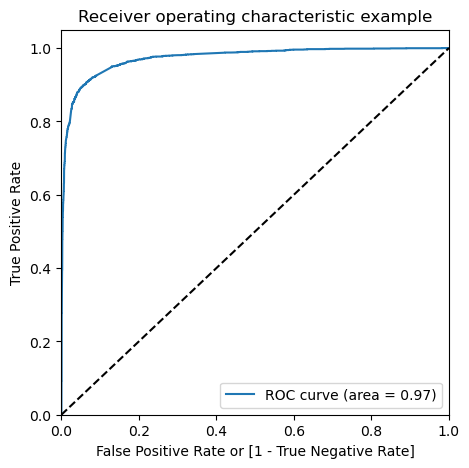

In [142]:
# Call the ROC function
draw_roc(y_train, y_train_pred)

The area under the curve of the ROC is 0.97 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [150]:
y_train_full = pd.DataFrame({
    'y_true_converted': y_train, 
    'y_pred_score': y_train_pred
}) 
y_train_full.head() 

y_true_converted  y_pred_score
6676                 1      0.988849
6138                 1      0.996761
8650                 1      0.986010
3423                 0      0.046713
6552                 0      0.230676

In [153]:
# Create a table to present converted prediction based on different cut-off points

cutoff_points = [float(x)/10 for x in range(10)]
for i in cutoff_points:
    y_train_full[i]= y_train_pred.map(lambda x: 1 if x > i else 0)

y_train_full

y_true_converted  y_pred_score  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
6676                 1      0.988849    1    1    1    1    1    1    1    1   
6138                 1      0.996761    1    1    1    1    1    1    1    1   
8650                 1      0.986010    1    1    1    1    1    1    1    1   
3423                 0      0.046713    1    0    0    0    0    0    0    0   
6552                 0      0.230676    1    1    1    0    0    0    0    0   
...                ...           ...  ...  ...  ...  ...  ...  ...  ...  ...   
379                  1      0.491445    1    1    1    1    1    0    0    0   
84                   1      0.921246    1    1    1    1    1    1    1    1   
8341                 0      0.230676    1    1    1    0    0    0    0    0   
7191                 0      0.017047    1    0    0    0    0    0    0    0   
5847                 0      0.030174    1    0    0    0    0    0    0    0   

      0.8  0.9  
6676    1    1  
6138    1    1  
8650    1    1  
3423    0    0  
6552    0    0  
...   ...  ...  
379     0    0  
84      1    1  
8341    0    0  
7191    0    0  
5847    0    0  

[6246 rows x 12 columns]

In [190]:
df_cutoff = pd.DataFrame() 

for i in cutoff_points: 
    df_target_matching, confusion, df_metrics = evaluate_model(y_true=y_train, y_prob_pred=y_train_pred, cutoff=i, is_print=False) 
    df_cutoff = pd.concat([df_cutoff, df_metrics],axis='index') 

In [188]:
df_cutoff 

cutoff  accuracy  sensitivity  specificity       TPR       FPR  precision  \
0     0.0  0.380243     1.000000     0.000000  1.000000  1.000000   0.380243   
0     0.1  0.851585     0.972211     0.777577  0.972211  0.222423   0.728391   
0     0.2  0.894012     0.951579     0.858693  0.951579  0.141307   0.805130   
0     0.3  0.921230     0.913684     0.925859  0.913684  0.074141   0.883191   
0     0.4  0.925712     0.898526     0.942392  0.898526  0.057608   0.905388   
0     0.5  0.928274     0.879579     0.958150  0.879579  0.041850   0.928032   
0     0.6  0.924752     0.856000     0.966934  0.856000  0.033066   0.940768   
0     0.7  0.919629     0.829053     0.975200  0.829053  0.024800   0.953511   
0     0.8  0.904419     0.773895     0.984500  0.773895  0.015500   0.968388   
0     0.9  0.886808     0.717474     0.990700  0.717474  0.009300   0.979310   

     recall  PP_ratio  NP_ratio  
0  1.000000  0.380243       NaN  
0  0.972211  0.728391  0.978544  
0  0.951579  0.805130  0.966560  
0  0.913684  0.883191  0.945896  
0  0.898526  0.905388  0.938030  
0  0.879579  0.928032  0.928411  
0  0.856000  0.940768  0.916279  
0  0.829053  0.953511  0.902894  
0  0.773895  0.968388  0.876495  
0  0.717474  0.979310  0.851087

<Axes: xlabel='cutoff'>

<Figure size 500x2500 with 0 Axes>

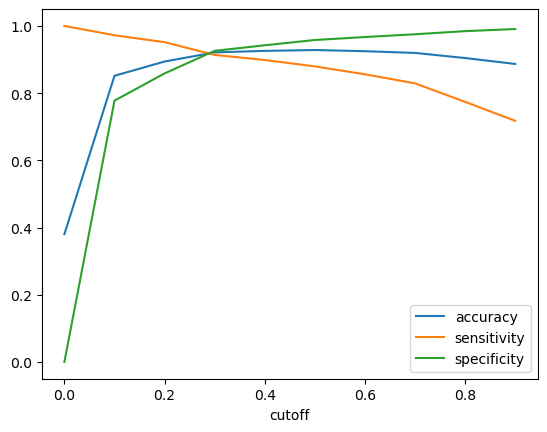

In [205]:
# Plotting to find the optimum cutoff
df_cutoff.plot.line('cutoff', ['accuracy', 'sensitivity', 'specificity']) 

- The optimum cutoff is 0.3 (intesect of accuracy, sensitivity and specificity) 

### 6.3 Evaluate the final model with optimum cut-off 

#### a. Evaluate the TRAIN set 

In [199]:
# 1. predict for TRAIN set 
y_train_pred = predict_logistic_sm(sm_fitted=sm_logistic_fitted, X=X_train[features_list])

# 2. Evaluate the TRAIN set 
_, _, _ =  evaluate_model(y_true=y_train, y_prob_pred=y_train_pred, cutoff=0.3) 

============Confusion Matrix:==========
[[3584  287]
 [ 205 2170]]
============Metrics:==========
  1. Accuracy score:  0.9212295869356388

  2.1 sensitivity (TPR):  0.9136842105263158
  2.2 specificity:  0.9258589511754068

  3.1 TPR:  0.9136842105263158
  3.2 FPR:  0.07414104882459313

  4.1 Precision:  0.8831908831908832
  4.2 recall:  0.9136842105263158

  5.1 Possitive_Prediction_ratio:  0.8831908831908832
  5.2 Negative_Prediction_ratio:  0.9458960147796253


#### b. Evaluate the TEST set 

In [200]:
# 1. predict for TEST set 
y_test_pred = predict_logistic_sm(sm_fitted=sm_logistic_fitted, X=X_test[features_list])

# 2. Evaluate the TEST set 
_, _, _ =  evaluate_model(y_true=y_test, y_prob_pred=y_test_pred, cutoff=0.3) 

============Confusion Matrix:==========
[[1555  129]
 [  79  915]]
============Metrics:==========
  1. Accuracy score:  0.9223300970873787

  2.1 sensitivity (TPR):  0.920523138832998
  2.2 specificity:  0.9233966745843231

  3.1 TPR:  0.920523138832998
  3.2 FPR:  0.07660332541567696

  4.1 Precision:  0.8764367816091954
  4.2 recall:  0.920523138832998

  5.1 Possitive_Prediction_ratio:  0.8764367816091954
  5.2 Negative_Prediction_ratio:  0.9516523867809058


## 7. Business Insights  

In [132]:
# Calculate score for leads in original dataset 
df_leads['Lead Score'] = round(predict_logistic_sm(sm_fitted=sm_logistic_fitted, X=df_leads[features_list]) * 100, 0) 

df_leads 

Do Not Email  Do Not Call  Converted  TotalVisits  \
0                0            0          0          0.0   
1                0            0          0          5.0   
2                0            0          1          2.0   
3                0            0          0          1.0   
4                0            0          1          2.0   
...            ...          ...        ...          ...   
9235             1            0          1          8.0   
9236             0            0          0          2.0   
9237             1            0          0          2.0   
9238             0            0          1          3.0   
9239             0            0          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
0                               0                  0.00       0         0   
1                             674                  2.50       0         0   
2                            1532                  2.00       0         0   
3                             305                  1.00       0         0   
4                            1428                  1.00       0         0   
...                           ...                   ...     ...       ...   
9235                         1845                  2.67       0         0   
9236                          238                  2.00       0         0   
9237                          199                  2.00       0         0   
9238                          499                  3.00       0         0   
9239                         1279                  3.00       0         0   

      Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                     0                   0          0                      0   
1                     0                   0          0                      0   
2                     0                   0          0                      0   
3                     0                   0          0                      0   
4                     0                   0          0                      0   
...                 ...                 ...        ...                    ...   
9235                  0                   0          0                      0   
9236                  0                   0          0                      0   
9237                  0                   0          0                      0   
9238                  0                   0          0                      0   
9239                  0                   0          0                      0   

      Through Recommendations  Receive More Updates About Our Courses  \
0                           0                                       0   
1                           0                                       0   
2                           0                                       0   
3                           0                                       0   
4                           0                                       0   
...                       ...                                     ...   
9235                        0                                       0   
9236                        0                                       0   
9237                        0                                       0   
9238                        0                                       0   
9239                        0                                       0   

      Update me on Supply Chain Content  Get updates on DM Content  \
0                                     0                          0   
1                                     0                          0   
2                                     0                          0   
3                                     0                          0   
4                                     0                          0   
...                                 ...                        ...   
9235                            

In [133]:
# Convert feature result to DataFrame 
results_as_html = sm_logistic_fitted.summary().tables[1].as_html()
df = pd.read_html(results_as_html, header=0, index_col=0)[0] 
df = df.sort_values(by='coef', ascending=False) 
df 

coef  std err       z  P>|z|  \
Tags_Closed by Horizzon                        7.3267    0.728  10.058  0.000   
Tags_Lost to EINS                              5.8232    0.536  10.870  0.000   
Lead Source_Welingak Website                   4.8716    0.751   6.487  0.000   
Tags_Will revert after reading the email       4.8165    0.191  25.163  0.000   
Last Activity_SMS Sent                         2.0761    0.119  17.425  0.000   
Total Time Spent on Website                    1.0581    0.061  17.451  0.000   
Lead Source_Olark Chat                         0.7653    0.160   4.777  0.000   
Specialization_Supply Chain Management        -0.7145    0.318  -2.248  0.025   
Lead Origin_Landing Page Submission           -0.7680    0.131  -5.847  0.000   
Do Not Email                                  -1.0283    0.254  -4.042  0.000   
const                                         -1.0403    0.118  -8.796  0.000   
Last Notable Activity_Email Link Clicked      -1.1478    0.424  -2.709  0.007   
Tags_Interested in full time MBA              -1.5559    0.634  -2.456  0.014   
Last Notable Activity_Modified                -1.8114    0.128 -14.149  0.000   
Last Notable Activity_Olark Chat Conversation -1.9618    0.433  -4.528  0.000   
Tags_Interested in other courses              -2.0822    0.405  -5.145  0.000   
Tags_Not doing further education              -2.2506    1.023  -2.200  0.028   
Tags_Diploma holder (Not Eligible)            -2.3101    1.057  -2.185  0.029   
Tags_Already a student                        -3.0287    0.607  -4.990  0.000   
Tags_Ringing                                  -3.4529    0.250 -13.821  0.000   
Tags_invalid number                           -3.9207    1.145  -3.425  0.001   
Tags_switched off                             -3.9950    0.743  -5.379  0.000   

                                               [0.025  0.975]  
Tags_Closed by Horizzon                         5.899   8.755  
Tags_Lost to EINS                               4.773   6.873  
Lead Source_Welingak Website                    3.400   6.343  
Tags_Will revert after reading the email        4.441   5.192  
Last Activity_SMS Sent                          1.843   2.310  
Total Time Spent on Website                     0.939   1.177  
Lead Source_Olark Chat                          0.451   1.079  
Specialization_Supply Chain Management         -1.338  -0.091  
Lead Origin_Landing Page Submission            -1.025  -0.511  
Do Not Email                                   -1.527  -0.530  
const                                          -1.272  -0.809  
Last Notable Activity_Email Link Clicked       -1.978  -0.317  
Tags_Interested in full time MBA               -2.798  -0.314  
Last Notable Activity_Modified                 -2.062  -1.560  
Last Notable Activity_Olark Chat Conversation  -2.811  -1.113  
Tags_Interested in other courses               -2.875  -1.289  
Tags_Not doing further education               -4.255  -0.246  
Tags_Diploma holder (Not Eligible)             -4.383  -0.238  
Tags_Already a student                         -4.218  -1.839  
Tags_Ringing                                   -3.943  -2.963  
Tags_invalid number                            -6.165  -1.677  
Tags_switched off                              -5.451  -2.539

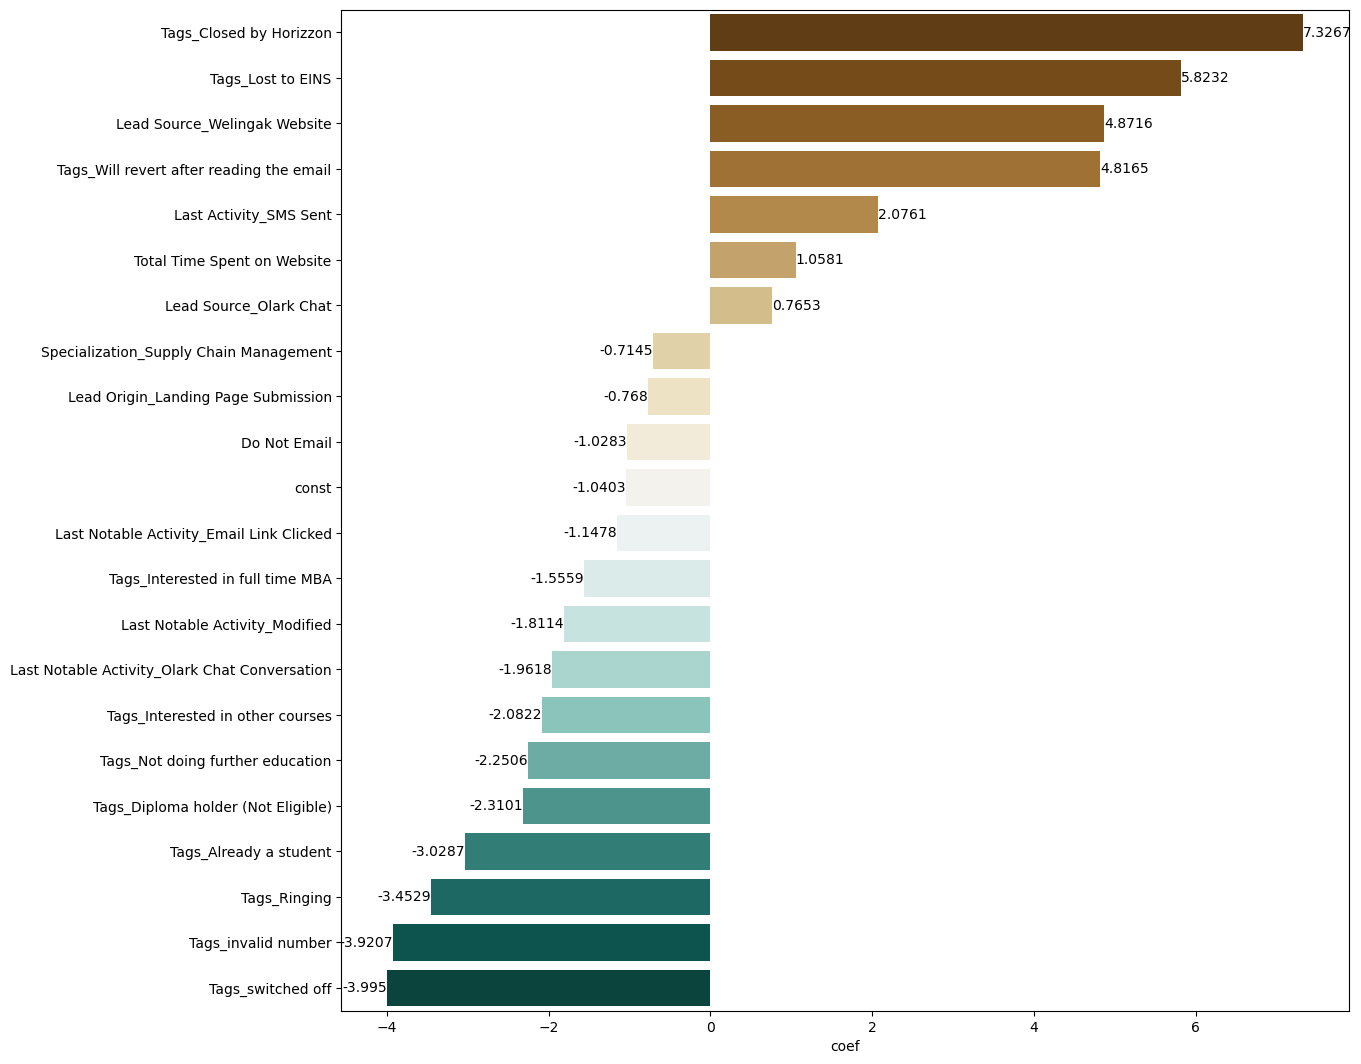

In [134]:
# Coefficent analysis 

plt.figure(figsize=[13, 13]) 
ax = sns.barplot(df['coef'], orient='h', palette='BrBG')   

for i in ax.containers:
    ax.bar_label(i,) 

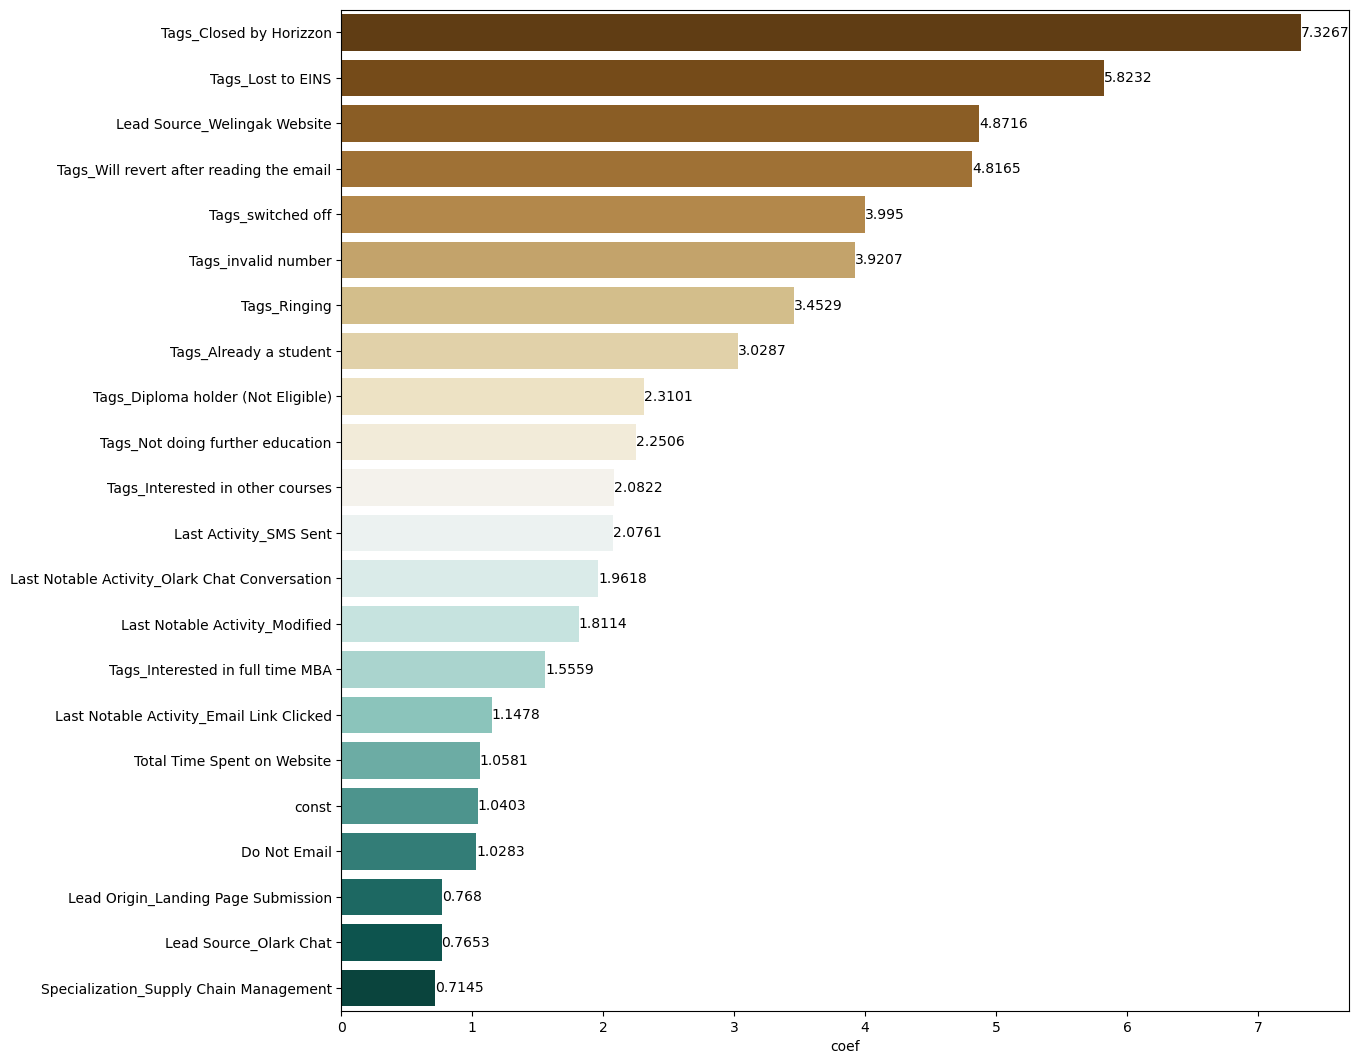

In [135]:
# Analyse the most contribute features to conversion rates 
# Based on the absolute Coefficent 

plt.figure(figsize=[13, 13]) 
ax = sns.barplot(np.abs(df['coef']).sort_values(ascending=False), orient='h', palette='BrBG')   

for i in ax.containers:
    ax.bar_label(i,) 